In [1]:
from Scripts.essentials import *

Available computational components
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 240568578372776407
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5835325440
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4685134480279143092
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 OEM, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [2]:
flat_data = np.load("Data/FlatData.npy")
flat_data_RADAR = np.load("Data/FlatDataRADAR.npy")
flat_data_MANUAL = np.load("Data/FlatDataMANUAL.npy")

patient_id = np.load("Data/patient_id.npy")
lgm_labels = np.load("Data/lgm_labels.npy")

In [3]:
x_axis = pd.read_excel("Data/RamanFreqTable.xlsx")["Wave"].values

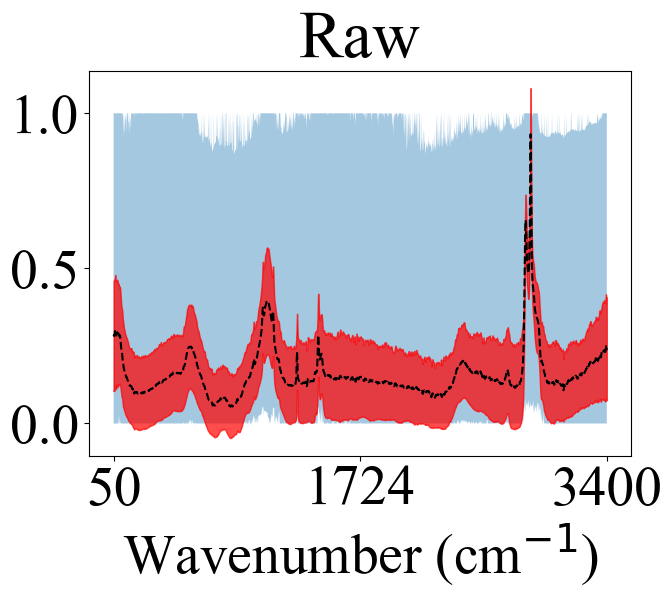

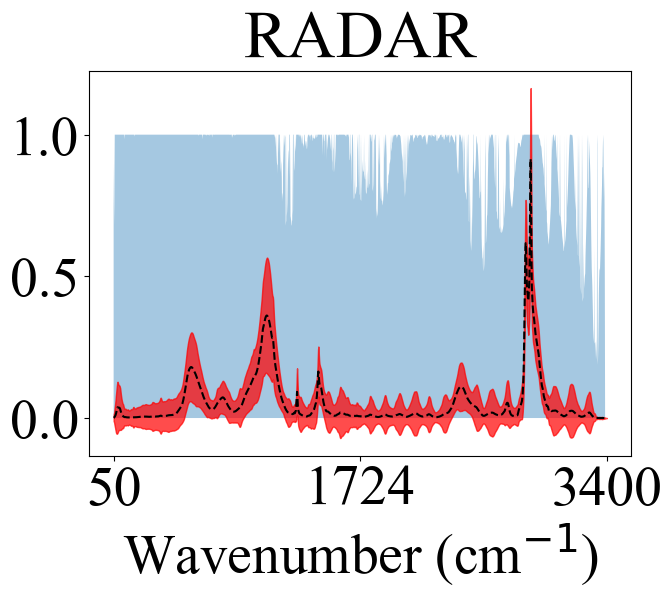

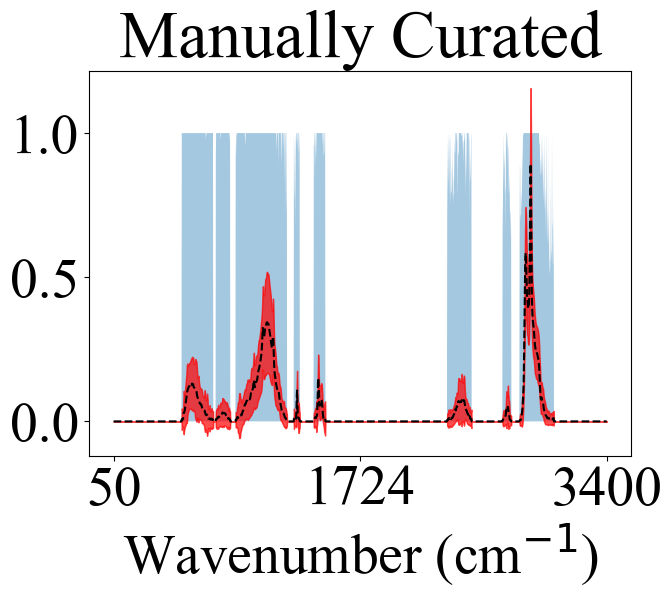

In [42]:
## Display the distribution of the different datasets
plt.rcParams.update({'font.size': 40})
plt.rcParams["font.family"] = "Times New Roman"

min_ = np.min(flat_data, axis = 0)
max_ = np.max(flat_data, axis = 0)
sd = np.std(flat_data, axis = 0)
mean = np.mean(flat_data, axis = 0)

plt.figure(figsize = (7, 5))
plt.fill_between(x_axis, min_, max_, alpha = 0.4)
plt.fill_between(x_axis, mean - sd, mean + sd, alpha = 0.7, color = "Red")
plt.xticks(x_axis[[0, int(1737/2), 1737]])
plt.xlabel(r"Wavenumber (cm$^{-1}$)")
plt.plot(x_axis, mean, linestyle = "--", color = "Black")
plt.title("Raw")
plt.savefig("Images/Histories/RawDistr.png", format="png", transparent = True,
                    dpi = 1000,
                    bbox_inches='tight',
                    pad_inches=0.5)
plt.show()



min_ = np.min(normalize(flat_data_RADAR), axis = 0)
max_ = np.max(normalize(flat_data_RADAR), axis = 0)
sd = np.std(normalize(flat_data_RADAR), axis = 0)
mean = np.mean(normalize(flat_data_RADAR), axis = 0)

plt.figure(figsize = (7, 5))
plt.fill_between(x_axis, min_, max_, alpha = 0.4)
plt.fill_between(x_axis, mean - sd, mean + sd, alpha = 0.7, color = "Red")
plt.xticks(x_axis[[0, int(1737/2), 1737]])
plt.xlabel(r"Wavenumber (cm$^{-1}$)")
plt.plot(x_axis, mean, linestyle = "--", color = "Black")
plt.title("RADAR")
plt.savefig("Images/Histories/RADARDistr.png", format="png", transparent = True,
                    dpi = 1000,
                    bbox_inches='tight',
                    pad_inches=0.5)
plt.show()



min_ = np.min(flat_data_MANUAL, axis = 0)
max_ = np.max(flat_data_MANUAL, axis = 0)
sd = np.std(flat_data_MANUAL, axis = 0)
mean = np.mean(flat_data_MANUAL, axis = 0)

plt.figure(figsize = (7, 5))
plt.fill_between(x_axis, min_, max_, alpha = 0.4)
plt.fill_between(x_axis, mean - sd, mean + sd, alpha = 0.7, color = "Red")
plt.xticks(x_axis[[0, int(1737/2), 1737]])
plt.xlabel(r"Wavenumber (cm$^{-1}$)")
plt.plot(x_axis, mean, linestyle = "--", color = "Black")
plt.title("Manually Curated")
plt.savefig("Images/Histories/MANUALDistr.png", format="png", transparent = True,
                    dpi = 1000,
                    bbox_inches='tight',
                    pad_inches=0.5)
plt.show()

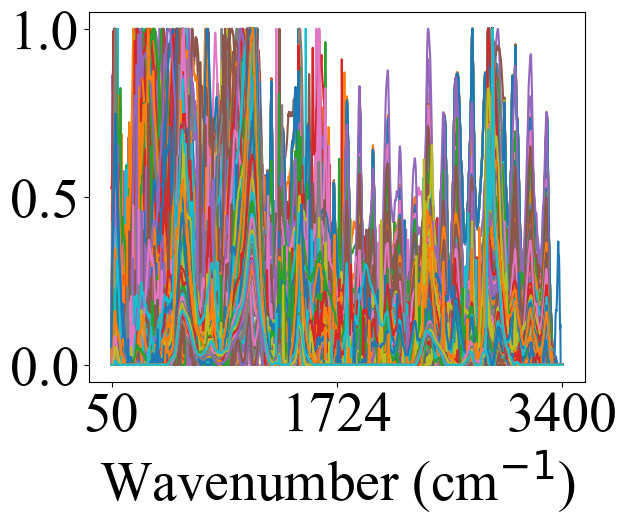

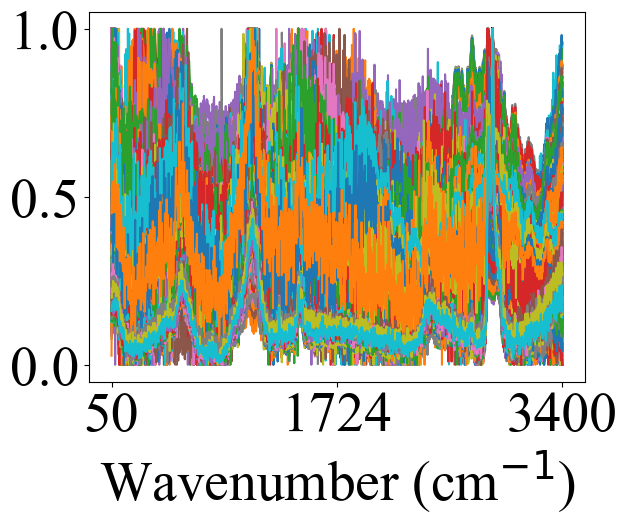

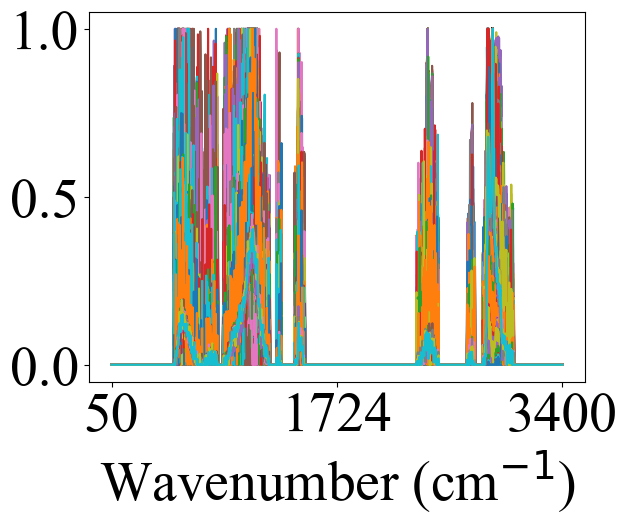

In [43]:
# Look at the 5000 first spectra, are there outliers? (Yes!)
plt.plot(x_axis, normalize(flat_data_RADAR[0:5000]).T)
plt.xticks(x_axis[[0, int(1737/2), 1737]])
plt.xlabel(r"Wavenumber (cm$^{-1}$)")
plt.show()

plt.plot(x_axis, flat_data[0:5000].T)
plt.xticks(x_axis[[0, int(1737/2), 1737]])
plt.xlabel(r"Wavenumber (cm$^{-1}$)")
plt.show()

plt.plot(x_axis, flat_data_MANUAL[0:5000].T)
plt.xticks(x_axis[[0, int(1737/2), 1737]])
plt.xlabel(r"Wavenumber (cm$^{-1}$)")
plt.show()

# Persisting non-tumor spectra
Remove them

Tumor spectra found: (260922, 1738)
Non-Tumor spectra found: (39584, 1738)


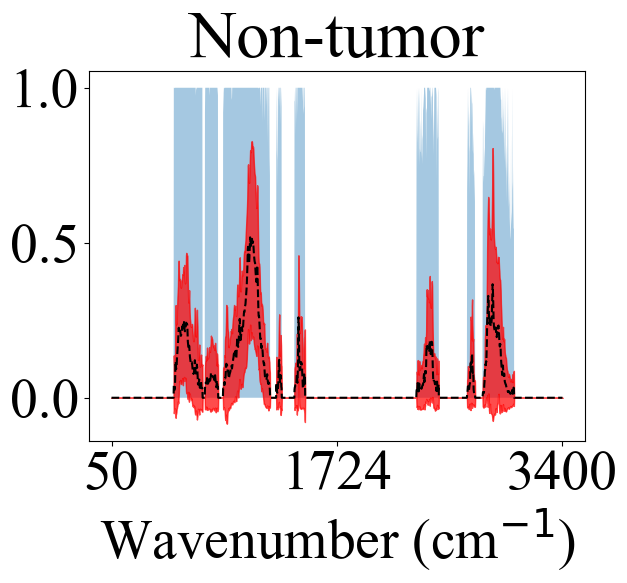

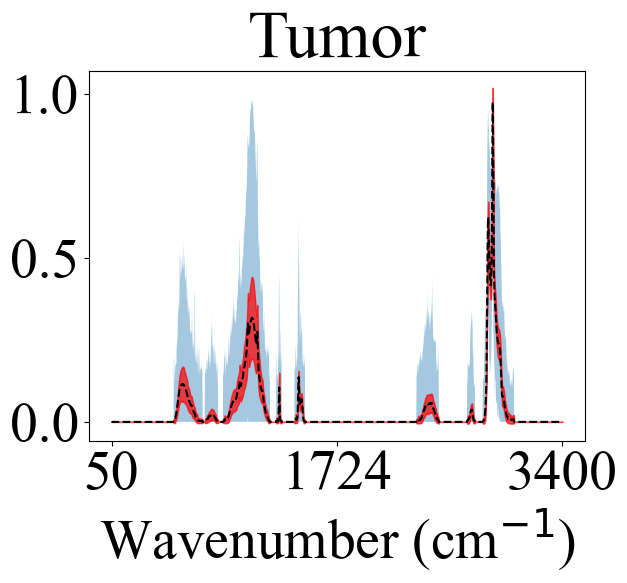

In [44]:
norm = np.load("Data/FlatDataMANUAL.npy")

for qs in [[0.005, 0.995]]:
    # Use quantiles to detect outliers
    min_ = np.quantile(norm, q = qs[0], axis = 0)
    max_ = np.quantile(norm, q = qs[1], axis = 0)

    # Get the indices of spectra which are outside the quantiles
    np.bitwise_and( norm[:, 0] < min_[0], norm[:, 0] > max_[0]).shape

    # Identify these
    non_outliers = np.array([np.bitwise_and(norm[:, i] >= min_[i], norm[:, i] <= max_[i]) for i in range(1738)])
    outliers = np.array([np.bitwise_or(norm[:, i] < min_[i], norm[:, i] > max_[i]) for i in range(1738)])

    # Get their indices
    non_out_ix = np.bitwise_and.reduce(non_outliers, axis = 0)
    out_ix = np.bitwise_or.reduce(outliers, axis = 0)


    print("Tumor spectra found:", norm[non_out_ix].shape)
    print("Non-Tumor spectra found:", norm[out_ix].shape)


    # Check the outliers
    min_ = np.min(norm[out_ix], axis = 0)
    max_ = np.max(norm[out_ix], axis = 0)
    sd = np.std(norm[out_ix], axis = 0)
    mean = np.mean(norm[out_ix], axis = 0)
    plt.fill_between(x_axis, min_, max_, alpha = 0.4)
    plt.fill_between(x_axis, mean - sd, mean + sd, alpha = 0.7, color = "Red")
    plt.plot(x_axis, mean, linestyle = "--", color = "Black")
    plt.xticks(x_axis[[0, int(1737/2), 1737]])
    plt.xlabel(r"Wavenumber (cm$^{-1}$)")
    plt.title("Non-tumor")
    plt.savefig("Images/Histories/MANUALOutliers.png", format="png", transparent = True,
                    dpi = 1000,
                    bbox_inches='tight',
                    pad_inches=0.5)
    plt.show()


    # Check non-outliers
    min_ = np.min(norm[non_out_ix], axis = 0)
    max_ = np.max(norm[non_out_ix], axis = 0)
    sd = np.std(norm[non_out_ix], axis = 0)
    mean = np.mean(norm[non_out_ix], axis = 0)
    plt.fill_between(x_axis, min_, max_, alpha = 0.4)
    plt.fill_between(x_axis, mean - sd, mean + sd, alpha = 0.7, color = "Red")
    plt.plot(x_axis, mean, linestyle = "--", color = "Black")
    plt.xticks(x_axis[[0, int(1737/2), 1737]])
    plt.xlabel(r"Wavenumber (cm$^{-1}$)")
    plt.title("Tumor")
    plt.savefig("Images/Histories/MANUALTumor.png", format="png", transparent = True,
                    dpi = 1000,
                    bbox_inches='tight',
                    pad_inches=0.5)
    plt.show()

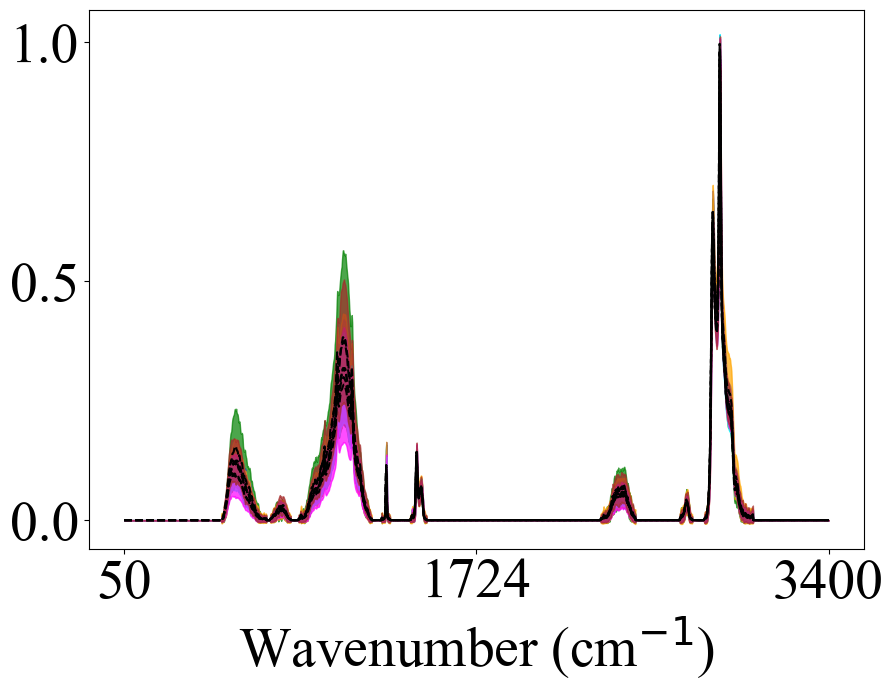

In [45]:

# Show the distribution of the different LGm classes
colors = ["Green", "Blue", "orange", "cyan", "magenta", "brown"]
plt.figure(figsize = (10, 7))
for lgm in np.unique(lgm_labels).astype(int)-1:
    d = norm[non_out_ix]
    d = d[lgm_labels[non_out_ix].astype(int) == lgm+1]

    min_ = np.min(d, axis = 0)
    max_ = np.max(d, axis = 0)
    sd = np.std(d, axis = 0)
    mean = np.mean(d, axis = 0)

    plt.fill_between(x_axis, mean - sd, mean + sd, alpha = 0.7, color = colors[lgm])
    plt.plot(x_axis, mean, linestyle = "--", color = "black")
    plt.xticks(x_axis[[0, int(1737/2), 1737]])
    plt.xlabel(r"Wavenumber (cm$^{-1}$)")

plt.show()

HF-1293_13_1.h5_0.npy


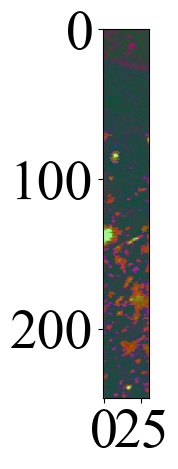

HF-1295_V3AM_2.h5_1.npy


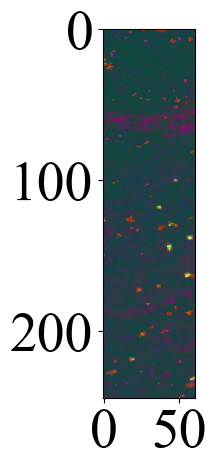

HF-2534_V2B_1.h5_2.npy


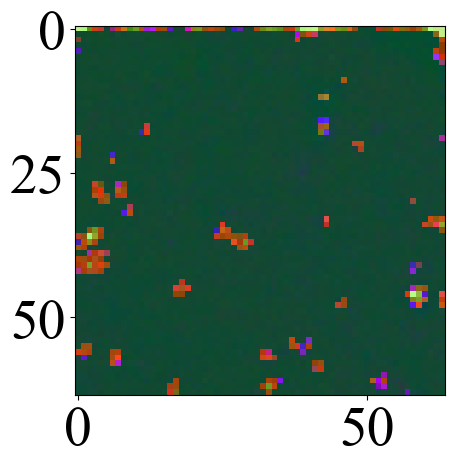

HF-448_V5B_1.h5_3.npy


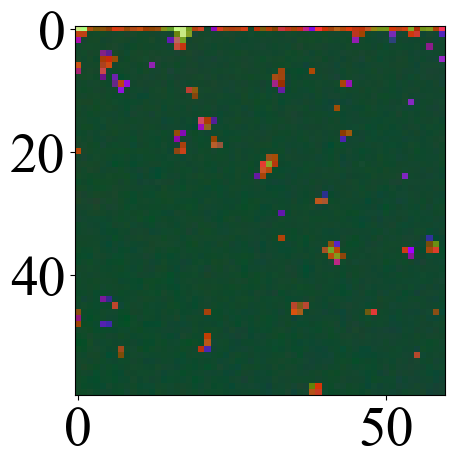

HF-868_1_2.h5_4.npy


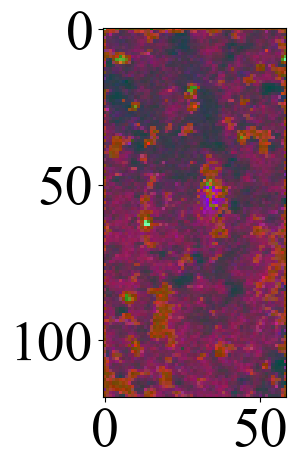

HF-1010_V1T_1.h5_0.npy


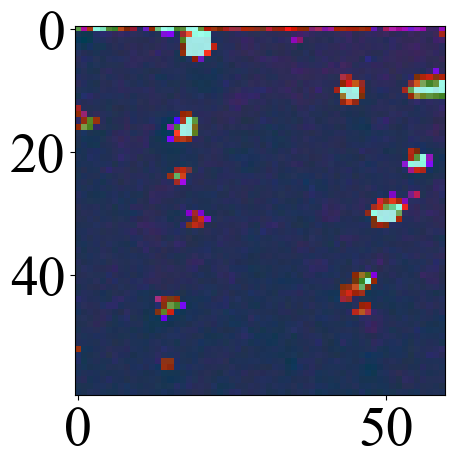

HF-1016_IAT_2.h5_1.npy


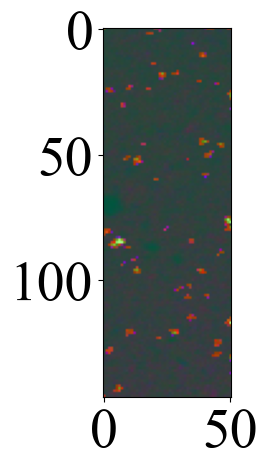

HF-1334_V58-B_2_1.h5_2.npy


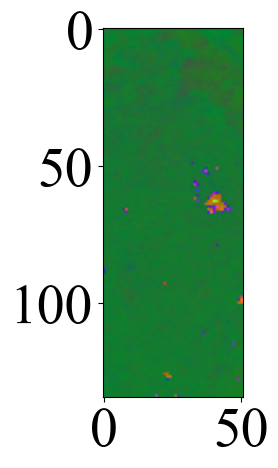

HF-1887_via-t_2_1.h5_3.npy


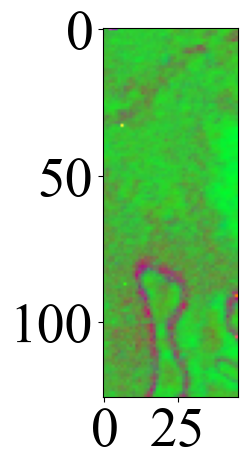

HF-2070_V1T_1.h5_4.npy


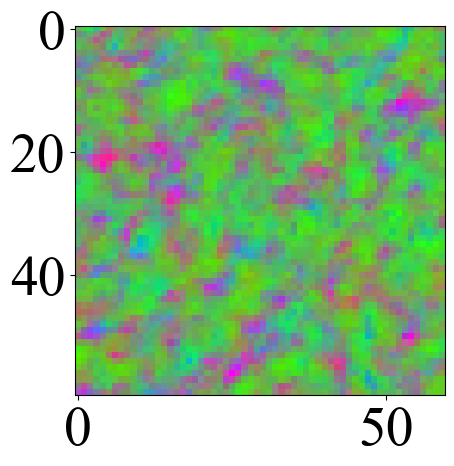

HF-2776_V2B_2.h5_5.npy


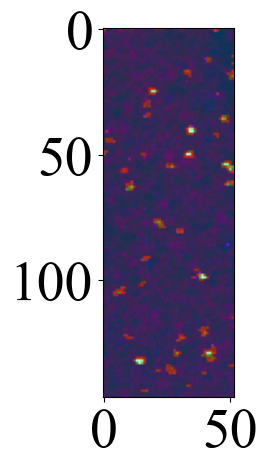

HF-305_v4b_1_1.h5_6.npy


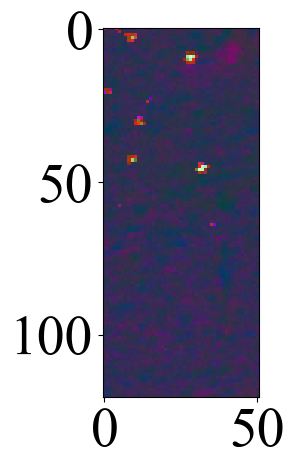

HF-3271_VIB_2.h5_7.npy


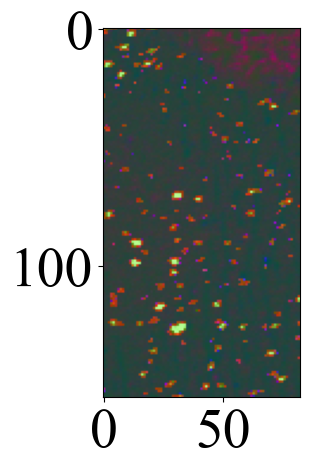

HF-3337_V3T_1.h5_8.npy


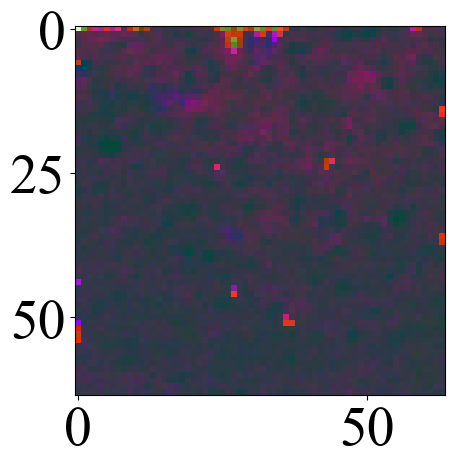

HF-615_V5BB_1.h5_9.npy


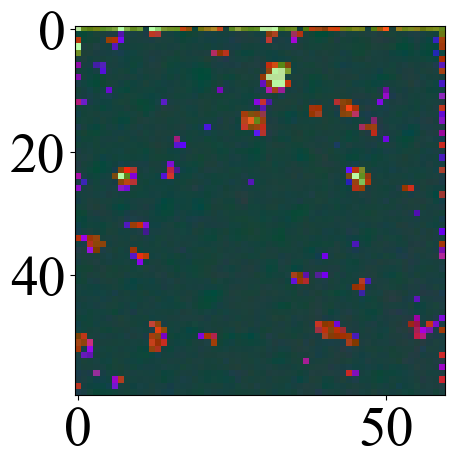

HF-901_V2T_2.h5_10.npy


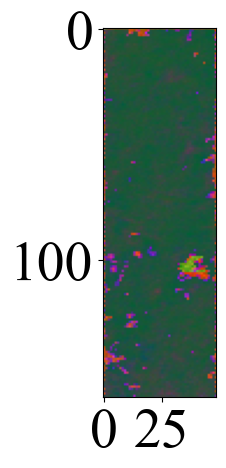

HF-960_VIAT_2.h5_11.npy


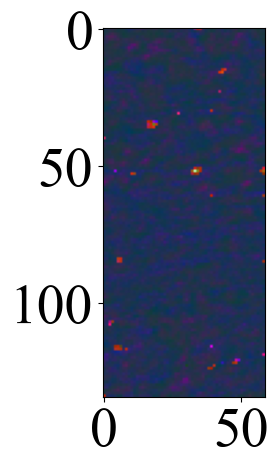

HF-2104_#5_1.h5_0.npy


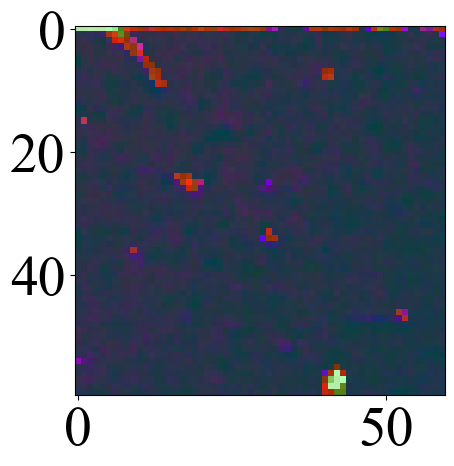

HF-2104_#9_1.h5_1.npy


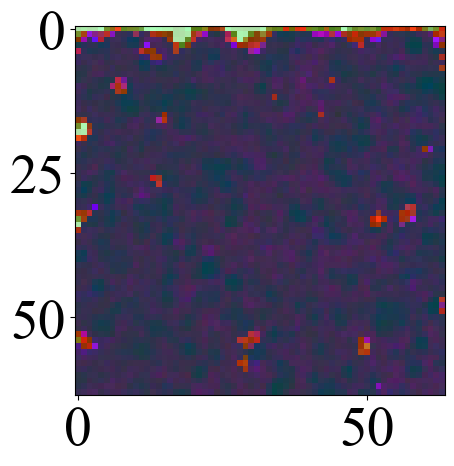

HF-2104_V1T_1.h5_2.npy


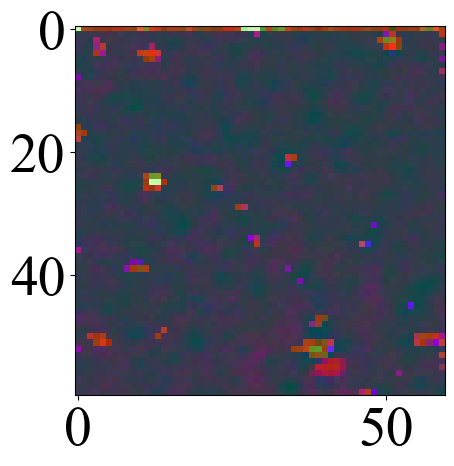

HF-2614_V1B_1.h5_3.npy


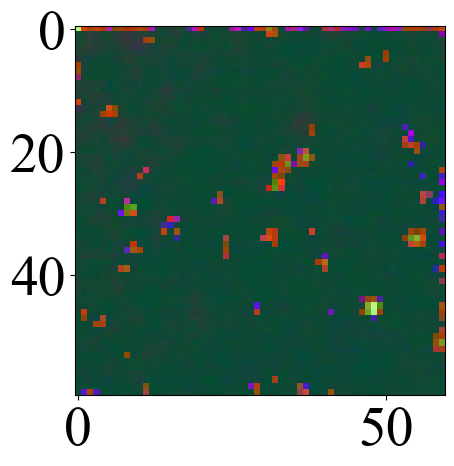

HF-2849_VIT2_1.h5_4.npy


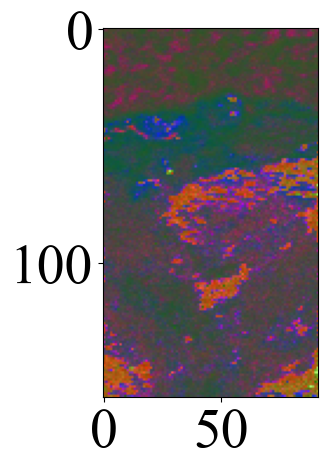

HF-2849_VIT2_1.h5_5.npy


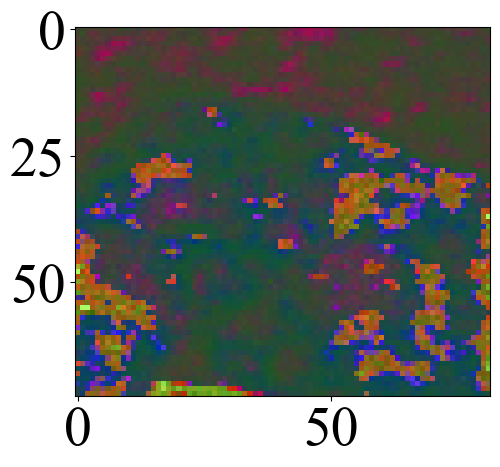

HF-2849_VIT2_2.h5_6.npy


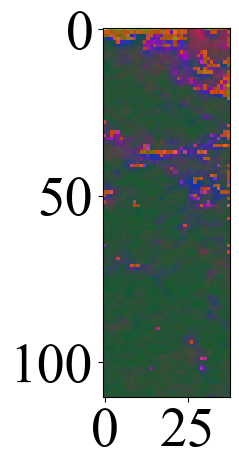

HF-2849_VIT_2_new2021.h5_7.npy


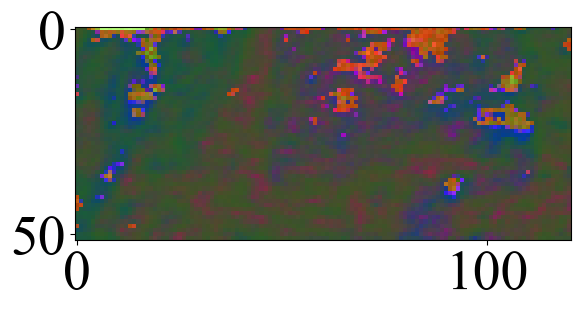

HF-2852_VIT_2_2.h5_8.npy


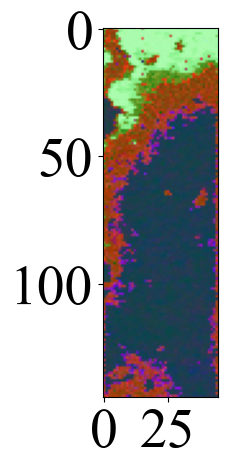

HF-1002_V1AT_1.h5_0.npy


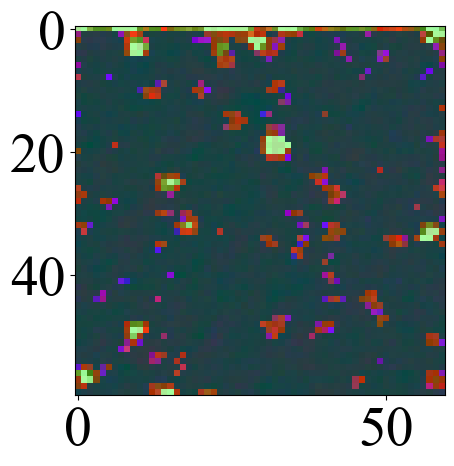

HF-1002_V2AT_1.h5_1.npy


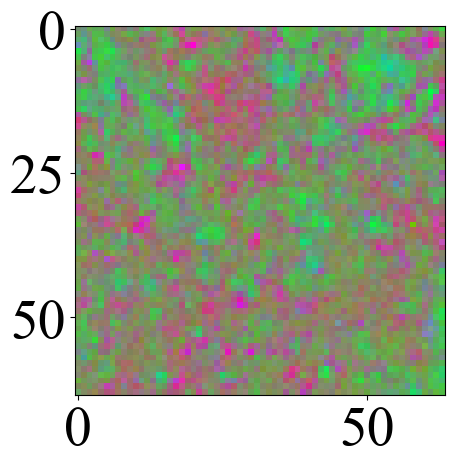

HF-1825_V2B_1.h5_2.npy


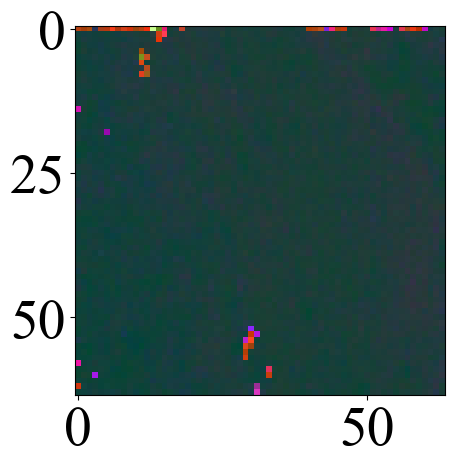

HF-2102_V2BB_1.h5_3.npy


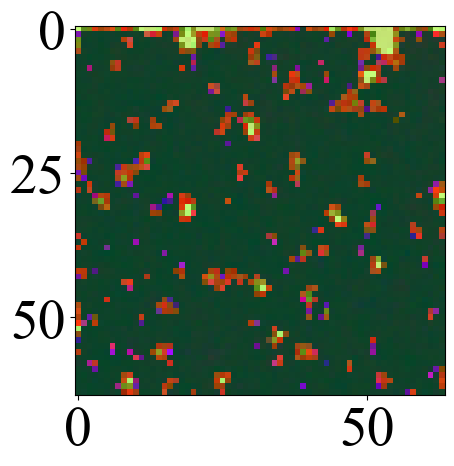

HF-2102_V3AM_1.h5_4.npy


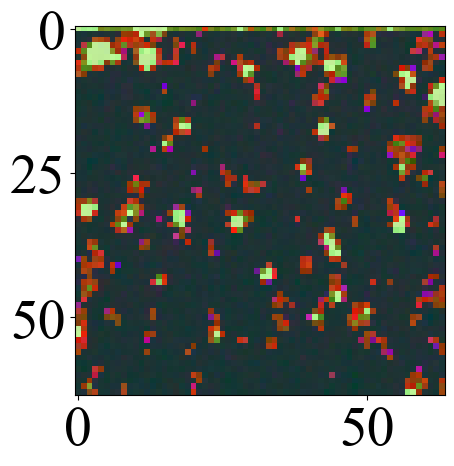

HF-2102_V3AM_2.h5_5.npy


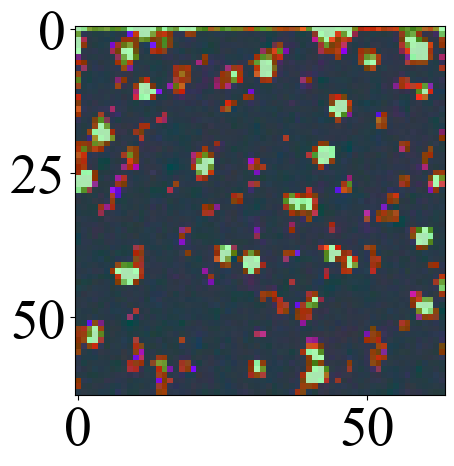

HF-2454_V1AT_1.h5_6.npy


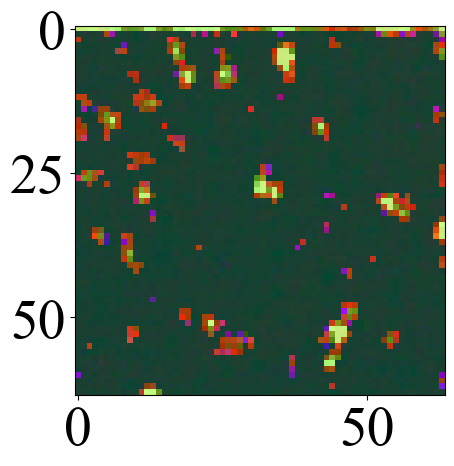

HF-2548_V1T_1.h5_7.npy


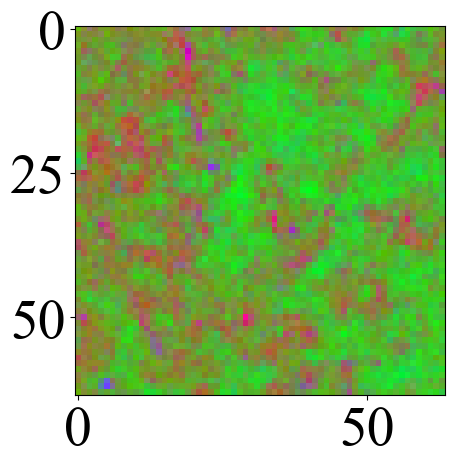

HF-2715_VIL_1.h5_8.npy


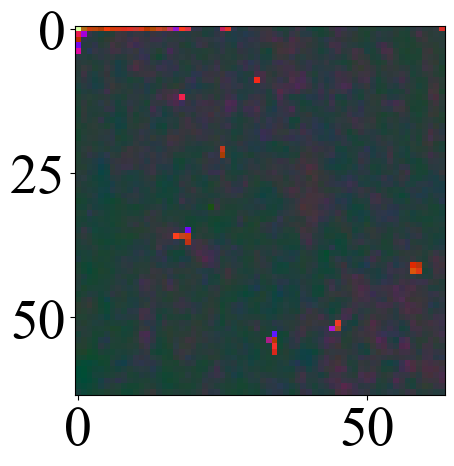

HF-2802_V3T_1.h5_9.npy


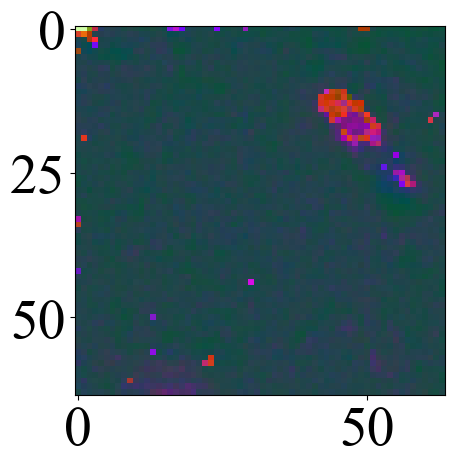

HF-2876_V1T_1.h5_10.npy


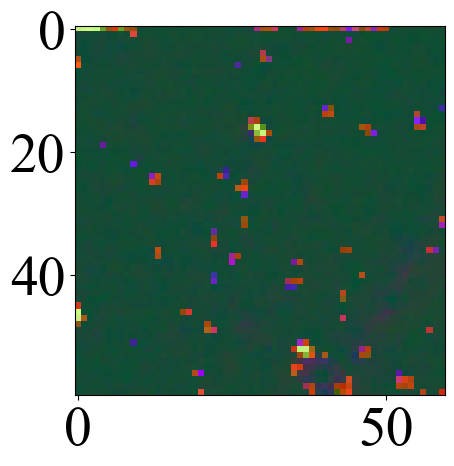

HF-2898_V1T_1.h5_11.npy


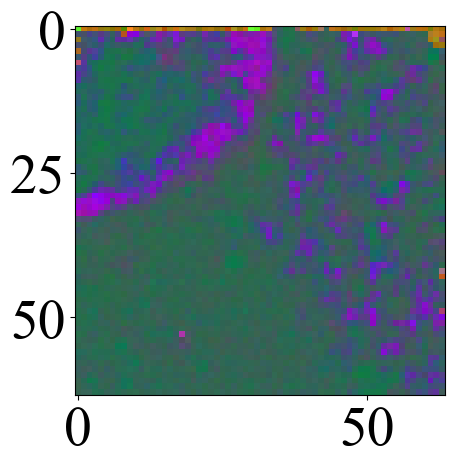

HF-442_V4BB_1.h5_12.npy


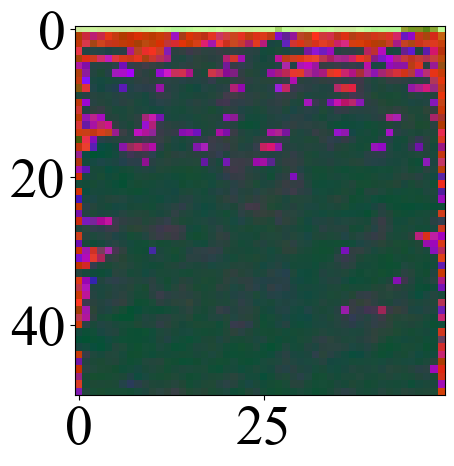

HF-1043_V1AM_1.h5_0.npy


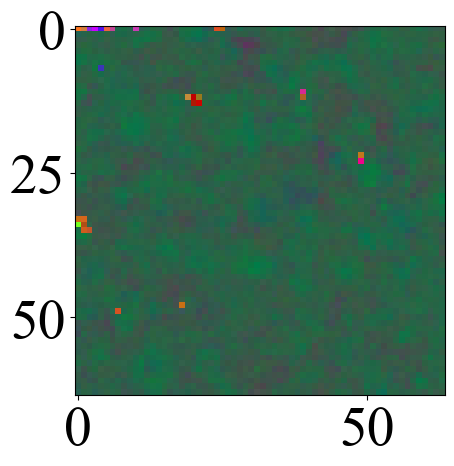

HF-1086_#1_1.h5_1.npy


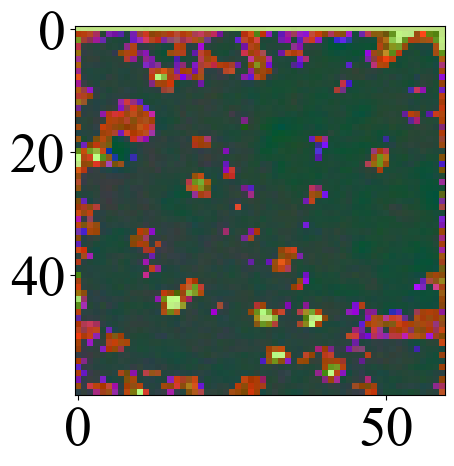

HF-2355_V2AM_1.h5_2.npy


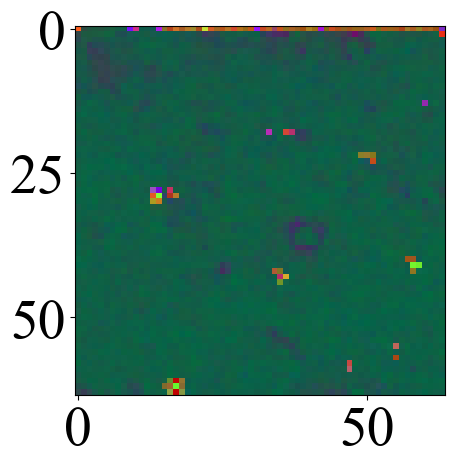

HF-2485_V1B_1.h5_3.npy


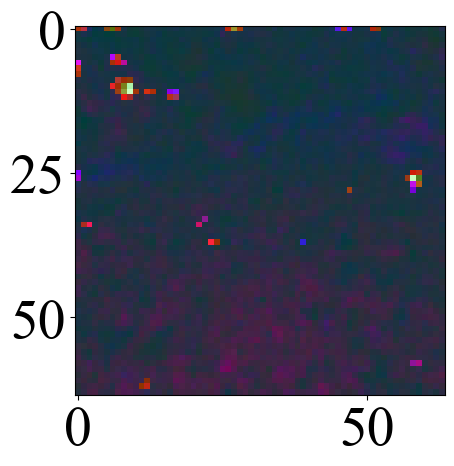

HF-2600_V1B_1.h5_4.npy


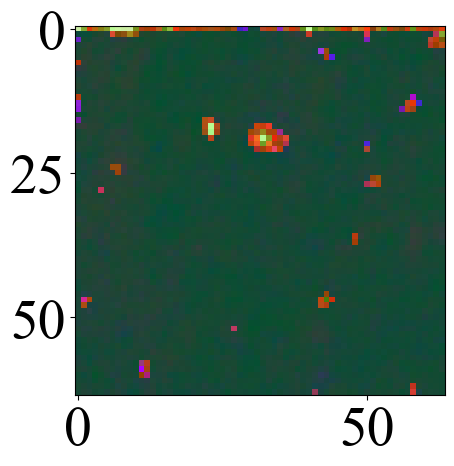

HF-2608_V1T_1.h5_5.npy


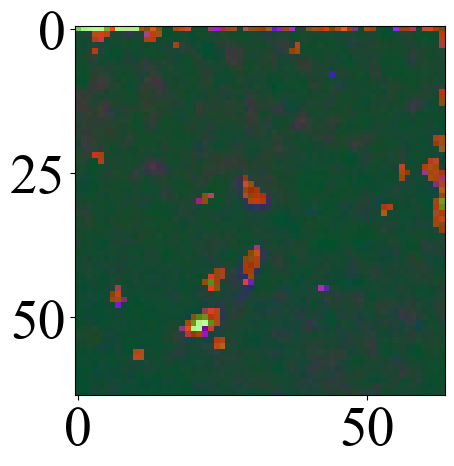

HF-2619_V1T_1.h5_6.npy


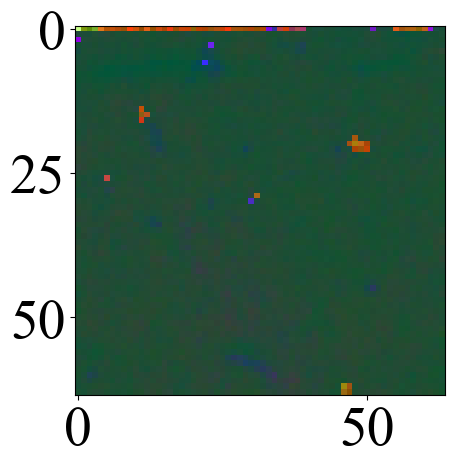

HF-2619_V4T_1.h5_7.npy


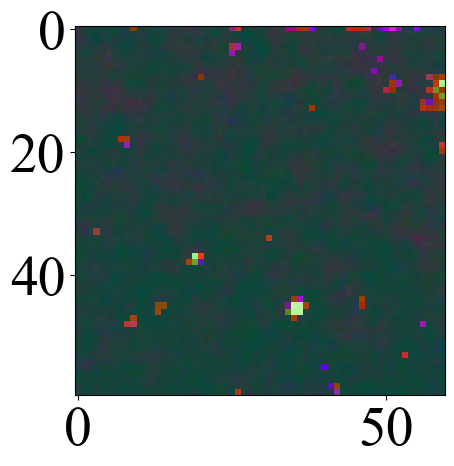

HF-2666_V2B_1.h5_8.npy


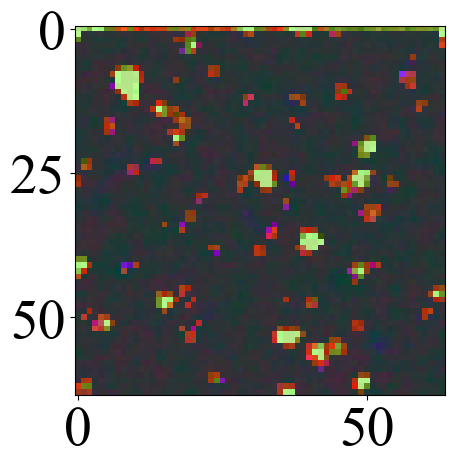

HF-682_V3AT_1.h5_9.npy


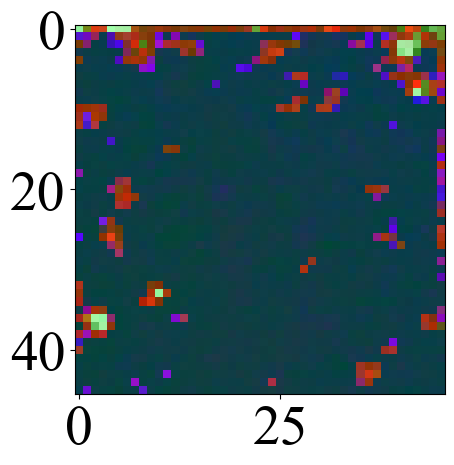

HF-682_V3BB_1.h5_10.npy


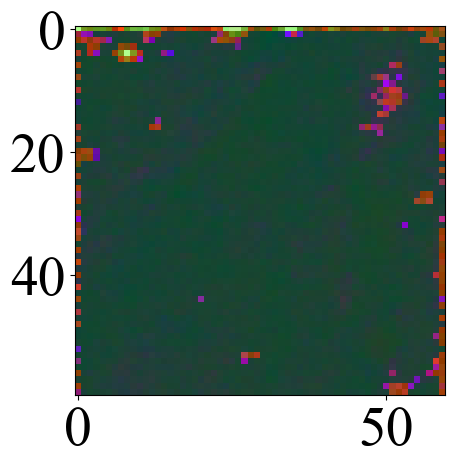

HF-894_9_1.h5_11.npy


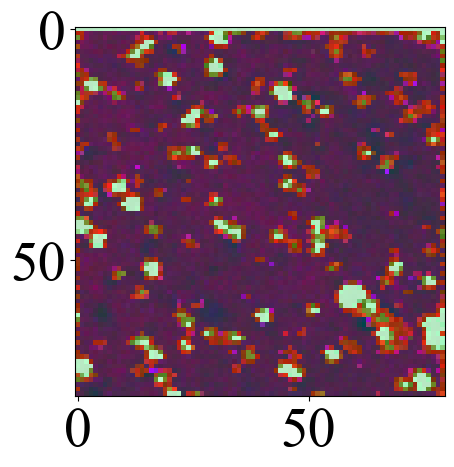

HF-894_V1BB_1.h5_12.npy


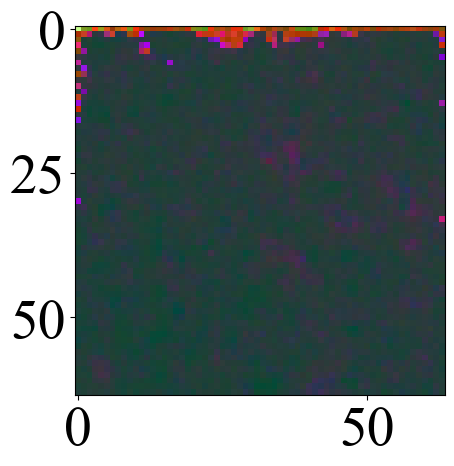

HF-988_V1-T_1.h5_13.npy


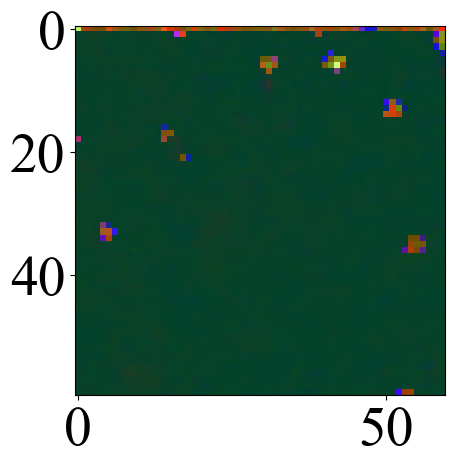

HF-988_V1B_1.h5_14.npy


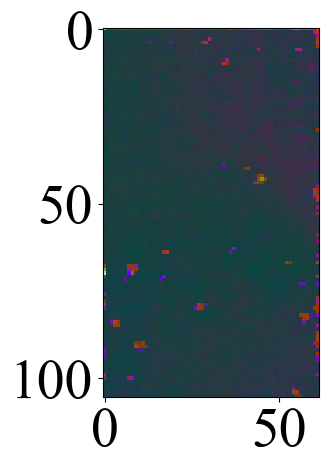

HF-2106_V3AM_1.h5_0.npy


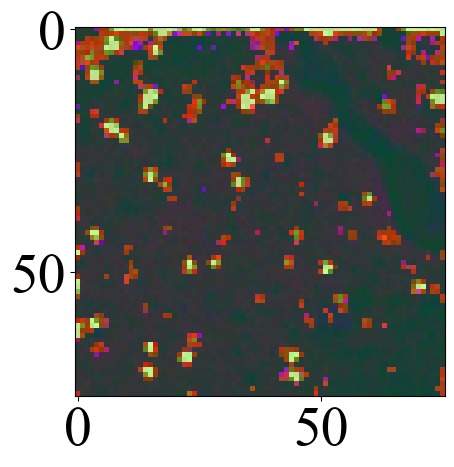

HF-2493_V1T_1.h5_1.npy


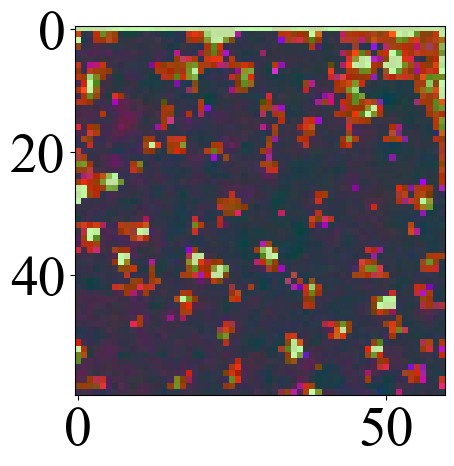

HF-2493_V1T_2.h5_2.npy


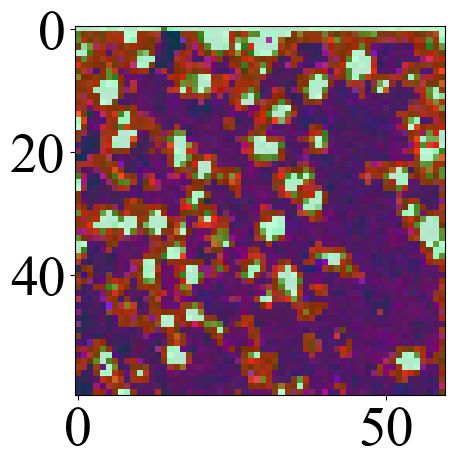

HF-2544_V1B_1.h5_3.npy


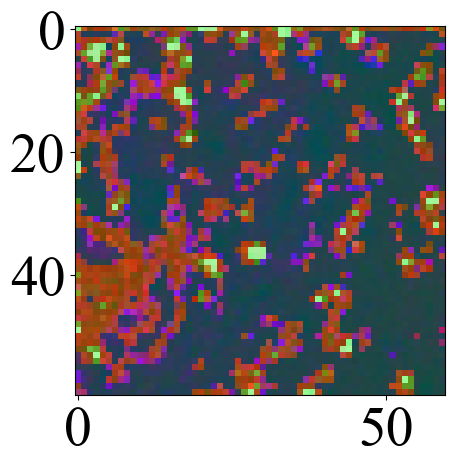

HF-592_V3T_1.h5_4.npy


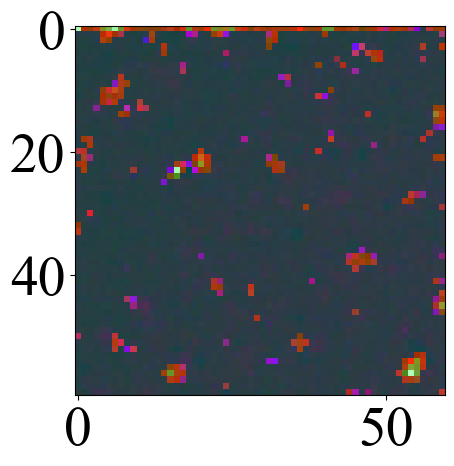

In [46]:
# Store pca plots before outlier removal to see their influence on the surfaces
pca = PCA(n_components = 3)
mean_ = np.expand_dims(np.mean(norm, axis = 0), 0)
std_ = np.expand_dims(np.std(norm, axis = 0), 0)

# Since PCA works by comparing variances per frequency, we standardize the frequencies of the entire dataset
std_data = (norm - mean_)/ (std_ + 0.00001)

# Train the pca model for the entire dataset
pca.fit(np.squeeze(std_data))

data_path = "Data/RawData/"

for lgm in os.listdir(data_path):
    
    if lgm in ["LGm-1", "LGm-2", "LGm-3", "LGm-4","LGm-5", "LGm-6"]:
        sample_path = data_path + lgm + "/"
        for sample in os.listdir(sample_path):
            sample_shape = np.load(sample_path+sample).shape
                
            print(sample)
            sample_spectra = norm[sample == patient_id]
            
            image = np.zeros((len(sample_spectra), 3))

            std_data = (sample_spectra - mean_)/ (std_ + 0.00001)
            points = pca.transform(std_data)
            _min = np.expand_dims(np.min(points, axis = 0), 0)
            _max = np.expand_dims(np.max(points, axis = 0), 0)
            points = ((points - _min) / (_max - _min)) * 255
            
    
            image = points
            image = image.astype(int)
            image = image.reshape((sample_shape[0], sample_shape[1], 3))
            np.save("Data/PCA_maps/" + sample +"_" +str(lgm)+".npy", image)
            plt.imshow(image)
            plt.savefig("Images/PCA_before_outlier_removal/"+sample +".png")
            plt.show()
                

In [47]:
pca = PCA(n_components = 3)
mean_ = np.expand_dims(np.mean(norm[non_out_ix], axis = 0), 0)
std_ = np.expand_dims(np.std(norm[non_out_ix], axis = 0), 0)

# Since PCA works by comparing variances per frequency, we standardize the frequencies of the entire dataset
std_data = (norm[non_out_ix] - mean_)/ (std_ + 0.00001)

# Train the pca model for the entire dataset
pca.fit(np.squeeze(std_data))

PCA(n_components=3)

HF-1293_13_1.h5_0.npy


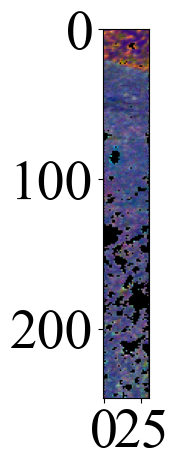

HF-1295_V3AM_2.h5_1.npy


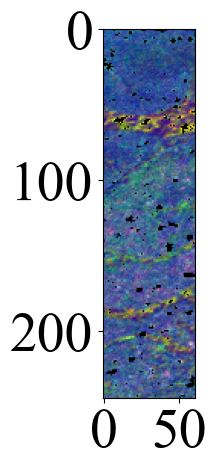

HF-2534_V2B_1.h5_2.npy


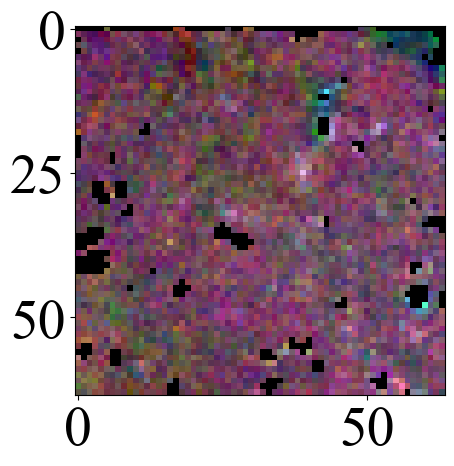

HF-448_V5B_1.h5_3.npy


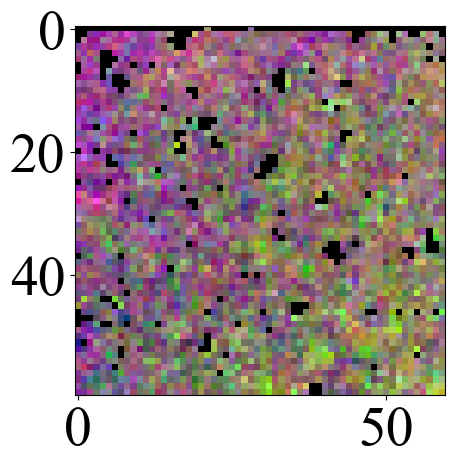

HF-868_1_2.h5_4.npy


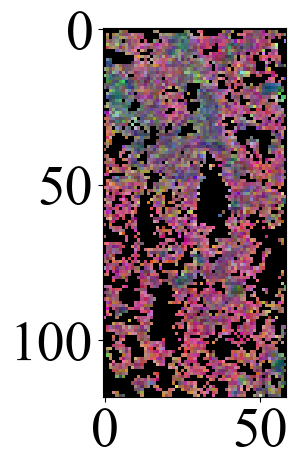

HF-1010_V1T_1.h5_0.npy


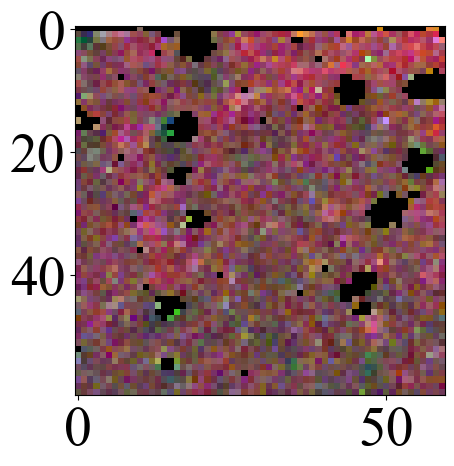

HF-1016_IAT_2.h5_1.npy


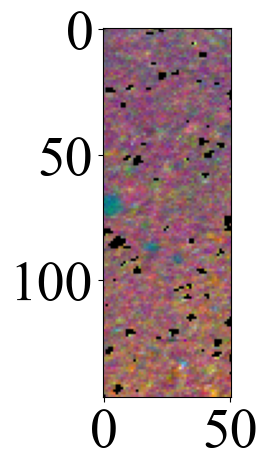

HF-1334_V58-B_2_1.h5_2.npy


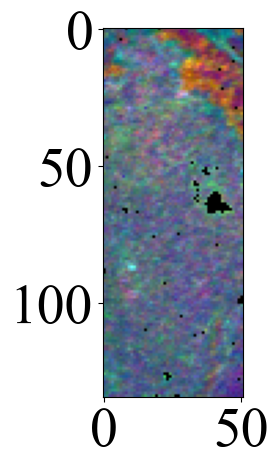

HF-1887_via-t_2_1.h5_3.npy


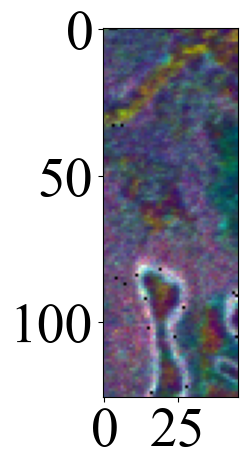

HF-2070_V1T_1.h5_4.npy


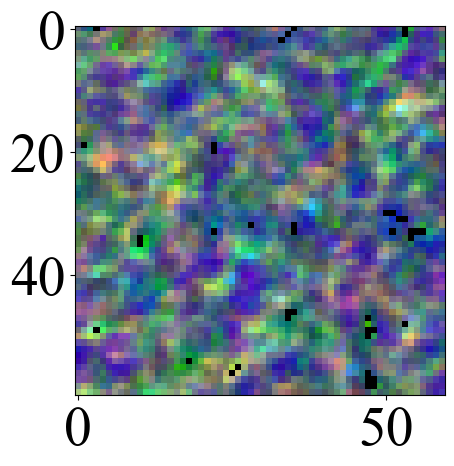

HF-2776_V2B_2.h5_5.npy


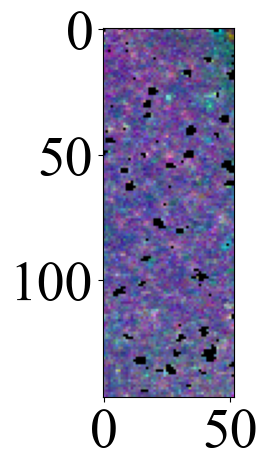

HF-305_v4b_1_1.h5_6.npy


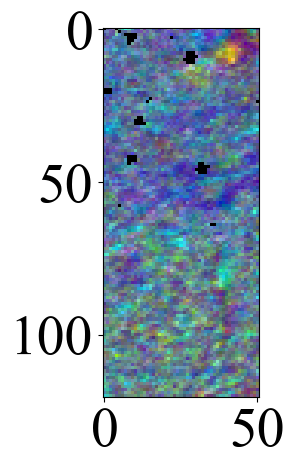

HF-3271_VIB_2.h5_7.npy


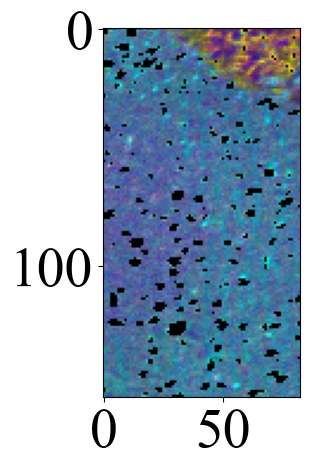

HF-3337_V3T_1.h5_8.npy


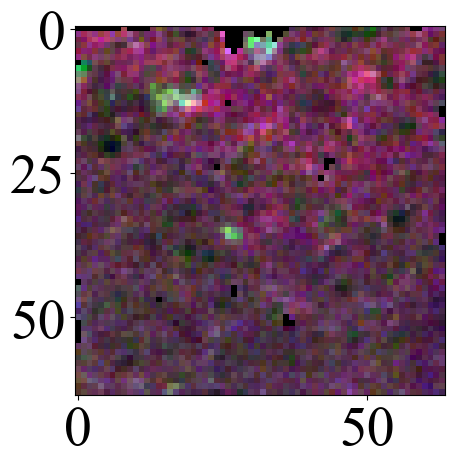

HF-615_V5BB_1.h5_9.npy


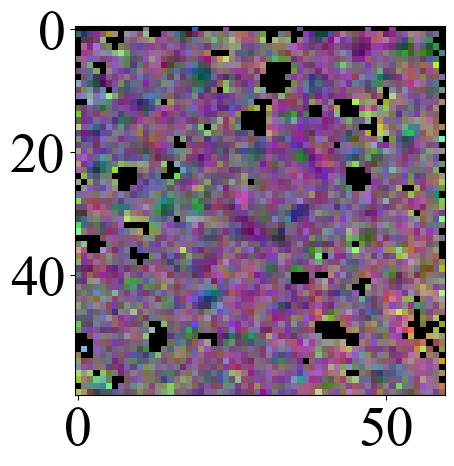

HF-901_V2T_2.h5_10.npy


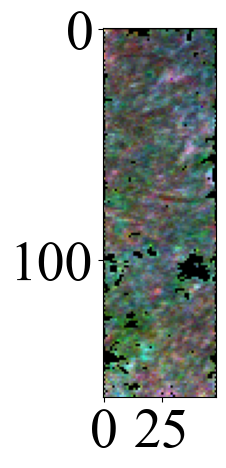

HF-960_VIAT_2.h5_11.npy


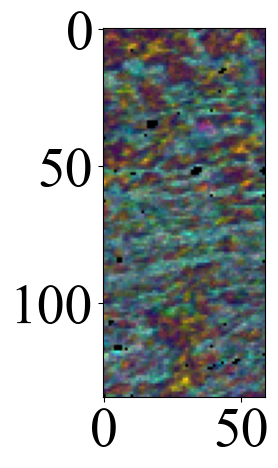

HF-2104_#5_1.h5_0.npy


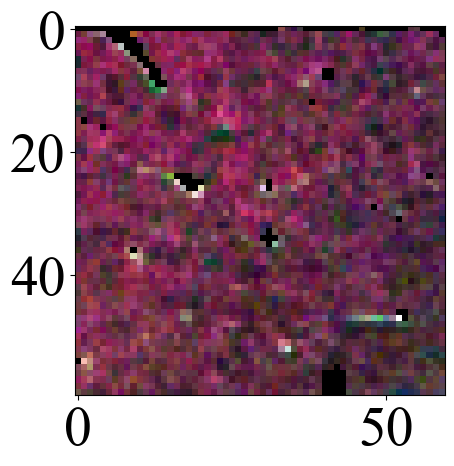

HF-2104_#9_1.h5_1.npy


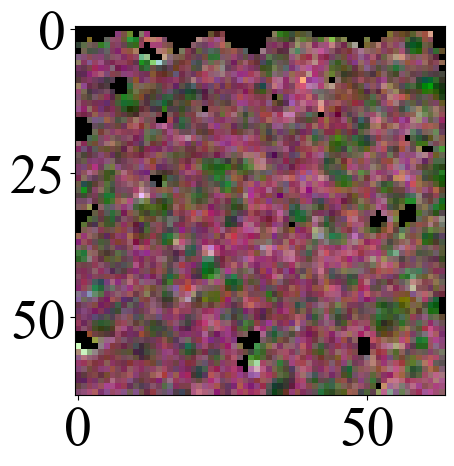

HF-2104_V1T_1.h5_2.npy


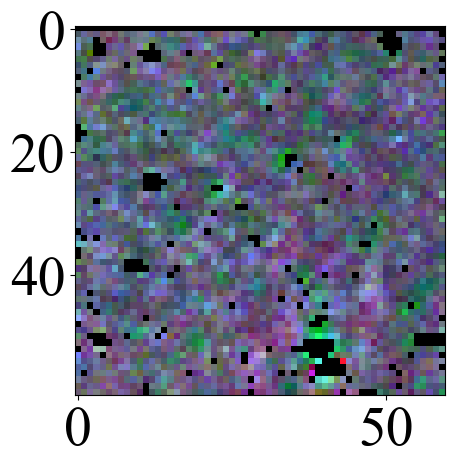

HF-2614_V1B_1.h5_3.npy


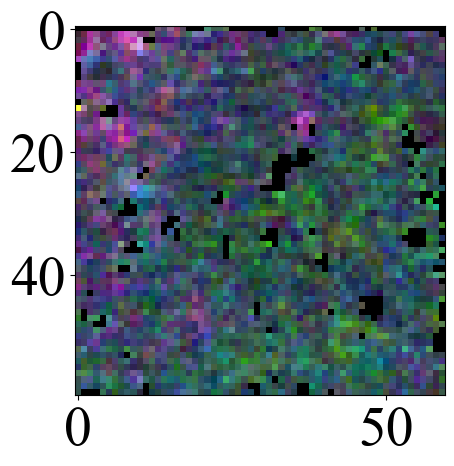

HF-2849_VIT2_1.h5_4.npy


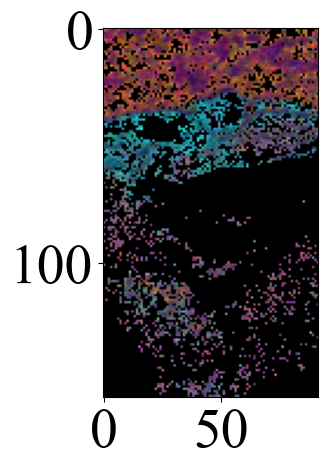

HF-2849_VIT2_1.h5_5.npy


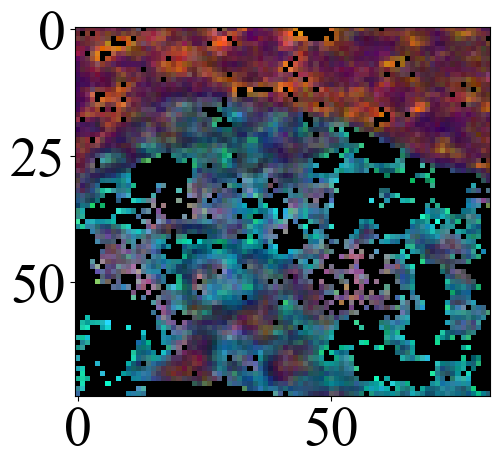

HF-2849_VIT2_2.h5_6.npy


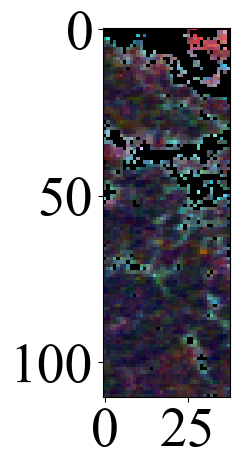

HF-2849_VIT_2_new2021.h5_7.npy


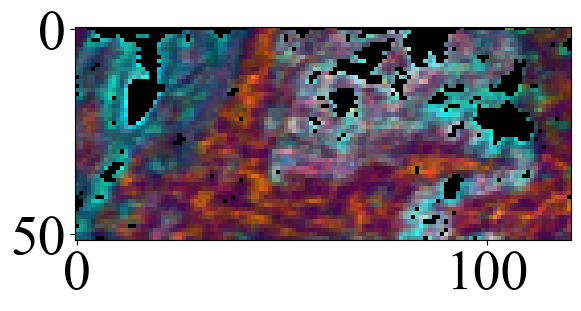

HF-2852_VIT_2_2.h5_8.npy


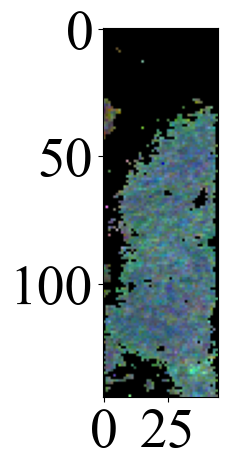

HF-1002_V1AT_1.h5_0.npy


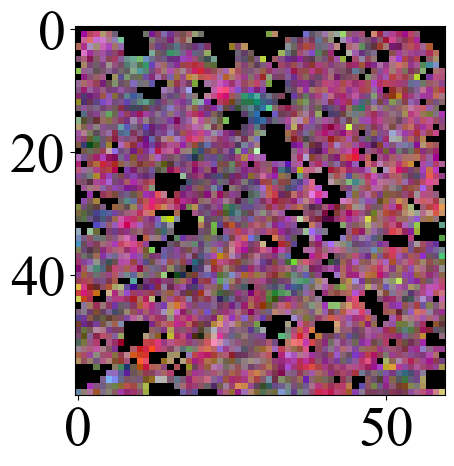

HF-1002_V2AT_1.h5_1.npy


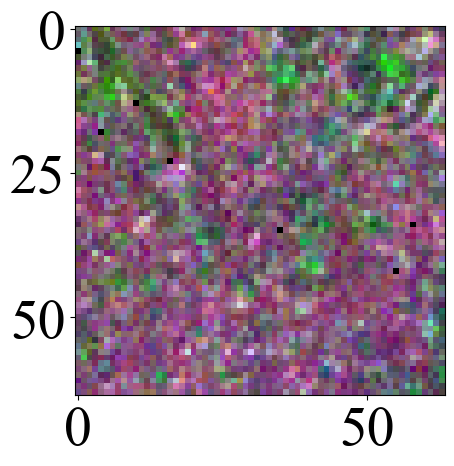

HF-1825_V2B_1.h5_2.npy


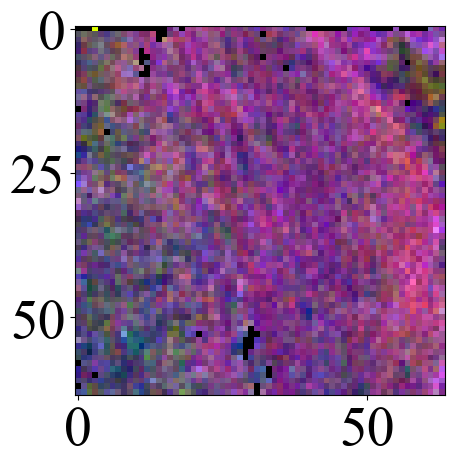

HF-2102_V2BB_1.h5_3.npy


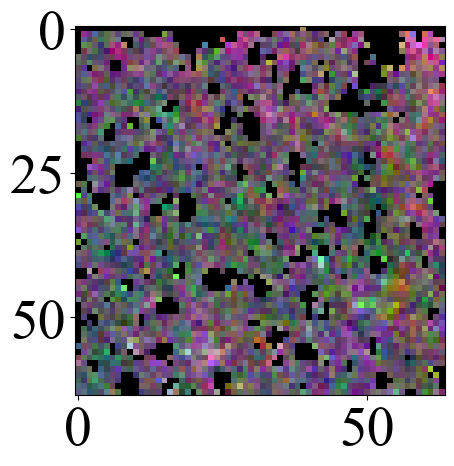

HF-2102_V3AM_1.h5_4.npy


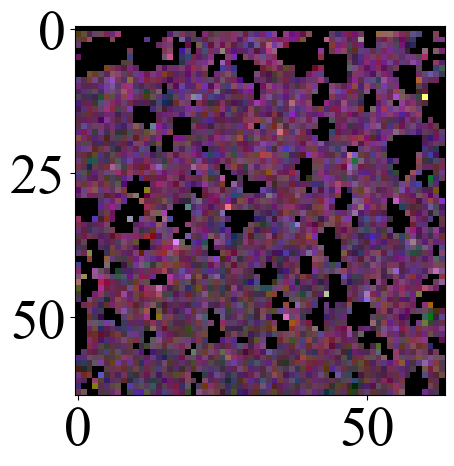

HF-2102_V3AM_2.h5_5.npy


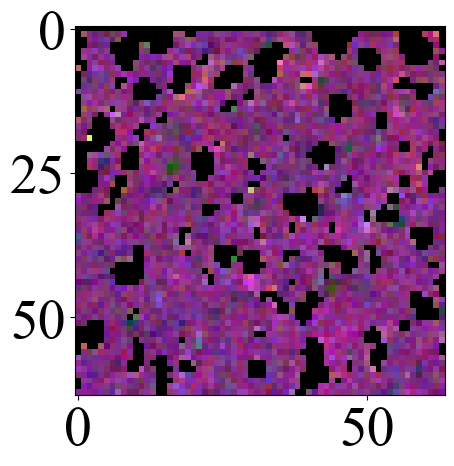

HF-2454_V1AT_1.h5_6.npy


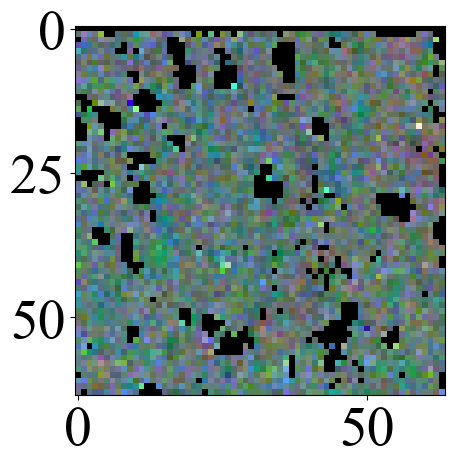

HF-2548_V1T_1.h5_7.npy


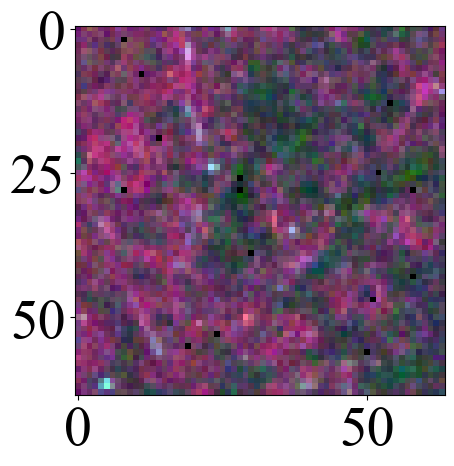

HF-2715_VIL_1.h5_8.npy


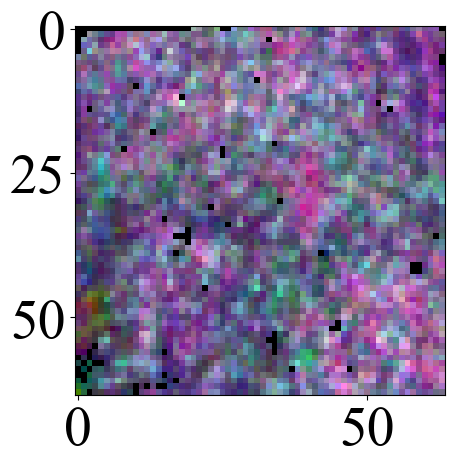

HF-2802_V3T_1.h5_9.npy


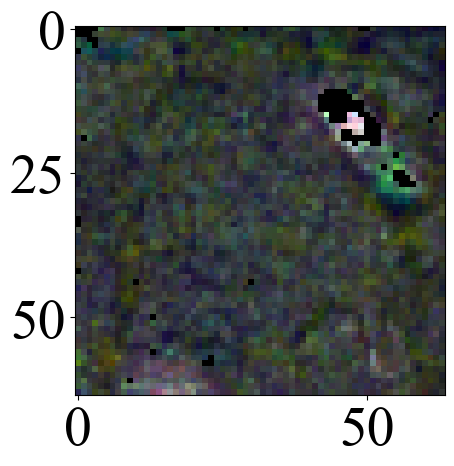

HF-2876_V1T_1.h5_10.npy


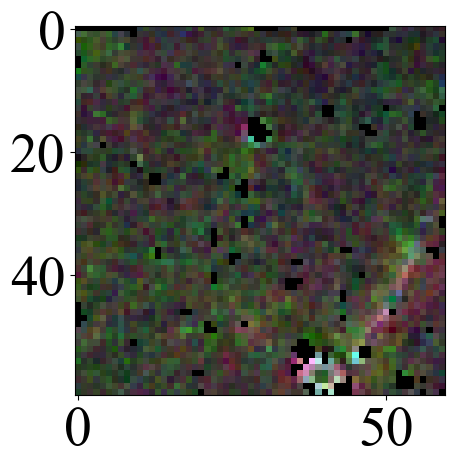

HF-2898_V1T_1.h5_11.npy


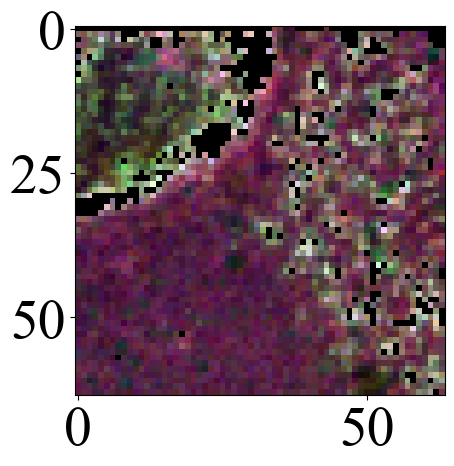

HF-442_V4BB_1.h5_12.npy


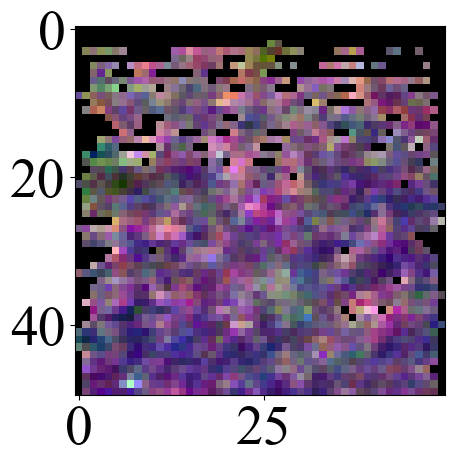

HF-1043_V1AM_1.h5_0.npy


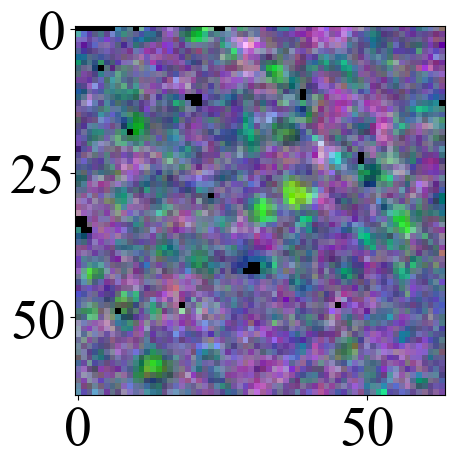

HF-1086_#1_1.h5_1.npy


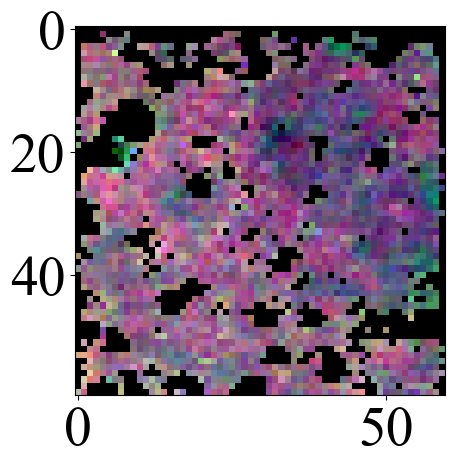

HF-2355_V2AM_1.h5_2.npy


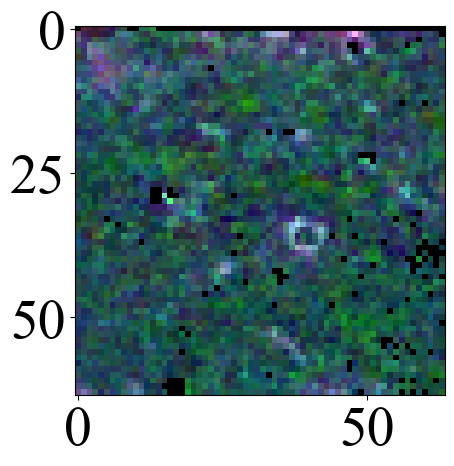

HF-2485_V1B_1.h5_3.npy


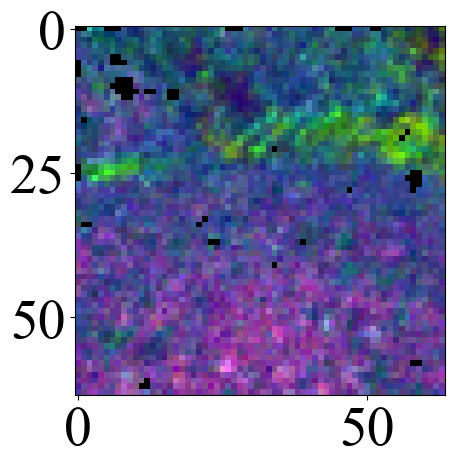

HF-2600_V1B_1.h5_4.npy


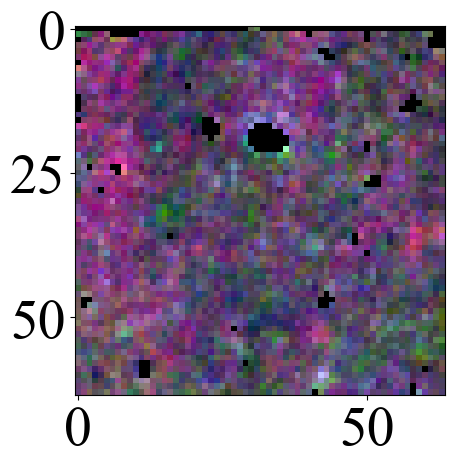

HF-2608_V1T_1.h5_5.npy


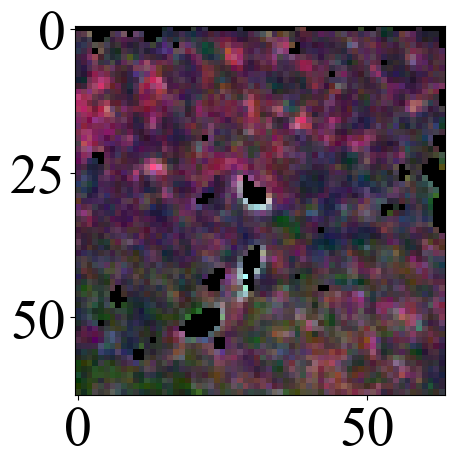

HF-2619_V1T_1.h5_6.npy


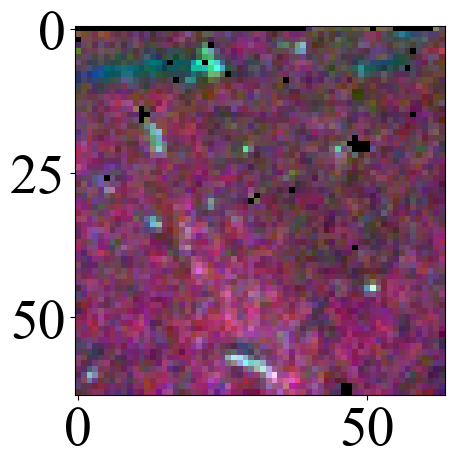

HF-2619_V4T_1.h5_7.npy


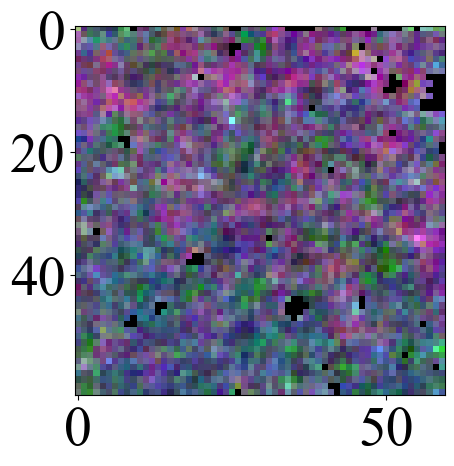

HF-2666_V2B_1.h5_8.npy


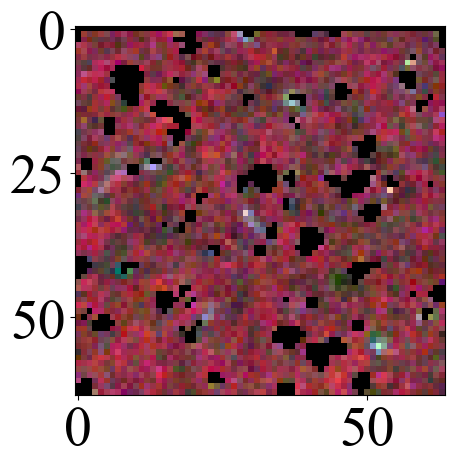

HF-682_V3AT_1.h5_9.npy


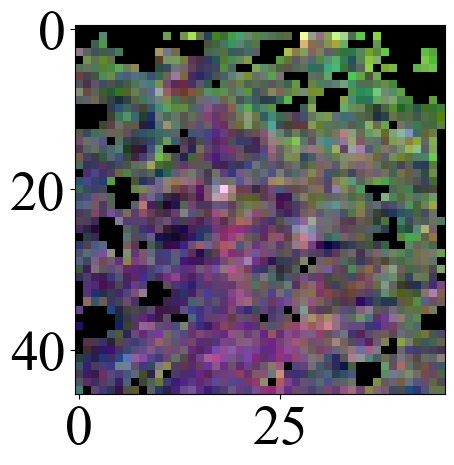

HF-682_V3BB_1.h5_10.npy


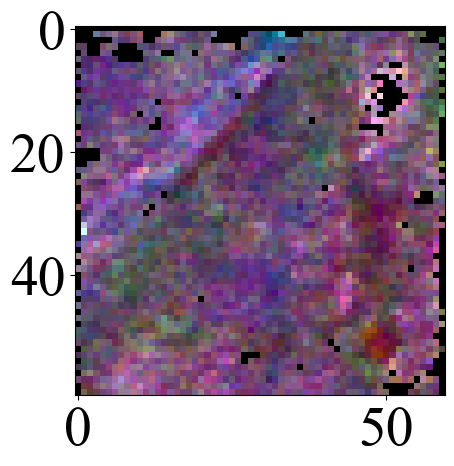

HF-894_9_1.h5_11.npy


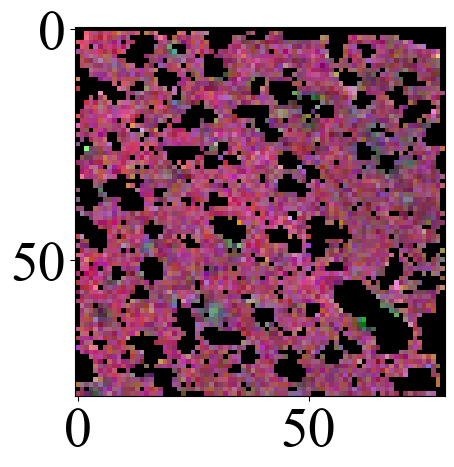

HF-894_V1BB_1.h5_12.npy


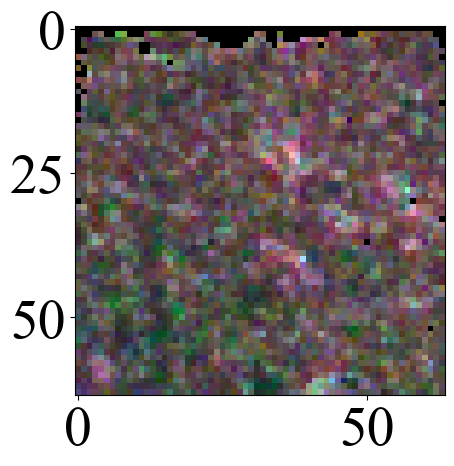

HF-988_V1-T_1.h5_13.npy


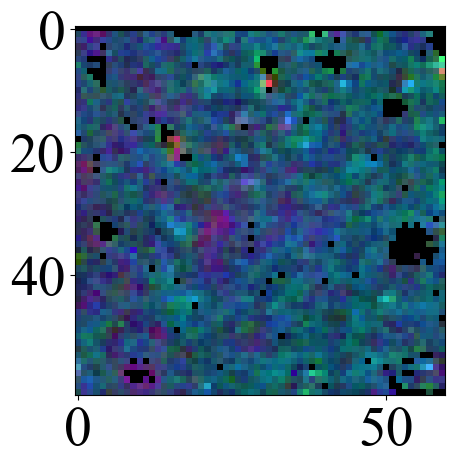

HF-988_V1B_1.h5_14.npy


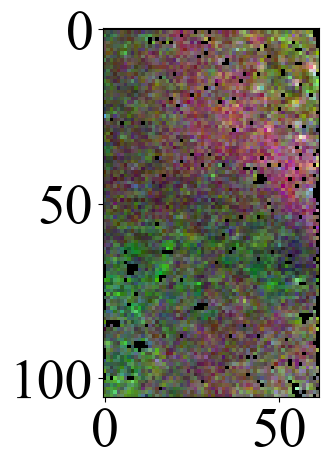

HF-2106_V3AM_1.h5_0.npy


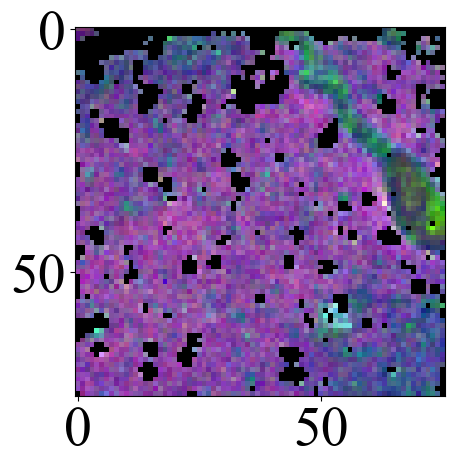

HF-2493_V1T_1.h5_1.npy


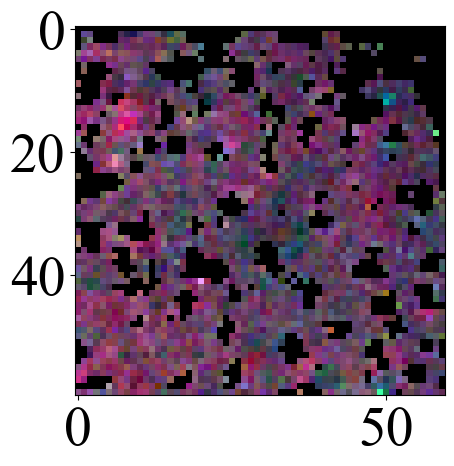

HF-2493_V1T_2.h5_2.npy


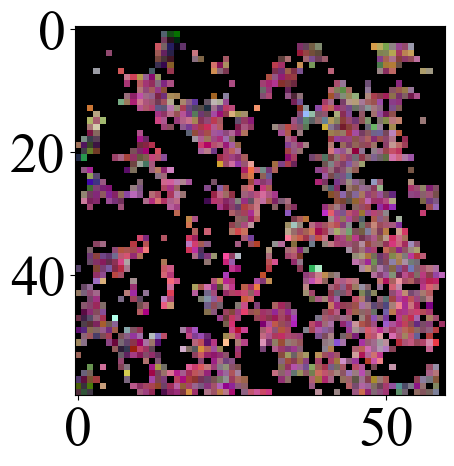

HF-2544_V1B_1.h5_3.npy


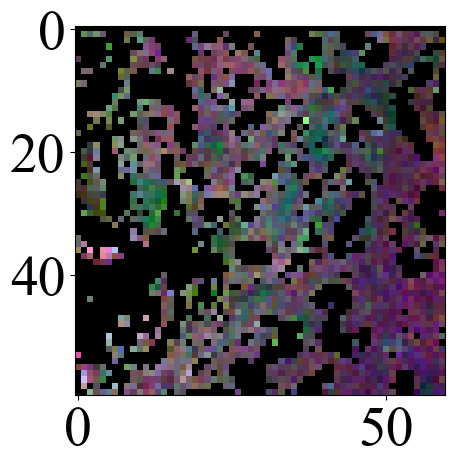

HF-592_V3T_1.h5_4.npy


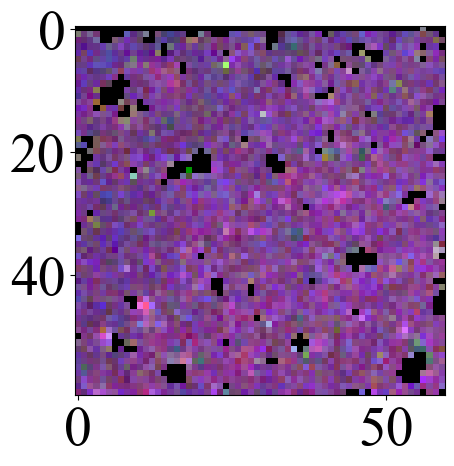

In [48]:
data_path = "Data/RawData/"

for lgm in os.listdir(data_path):
    
    if lgm in ["LGm-1", "LGm-2", "LGm-3", "LGm-4","LGm-5", "LGm-6"]:
        sample_path = data_path + lgm + "/"
        for sample in os.listdir(sample_path):
            sample_shape = np.load(sample_path+sample).shape
                
            print(sample)
            
            tumor_ix = non_out_ix[sample == patient_id]
            sample_spectra = norm[sample == patient_id]
            
            image = np.zeros((len(sample_spectra), 3))
            
            sample_spectra = sample_spectra[tumor_ix]
            
            std_data = (sample_spectra - mean_)/ (std_ + 0.00001)
            points = pca.transform(std_data)
            _min = np.expand_dims(np.min(points, axis = 0), 0)
            _max = np.expand_dims(np.max(points, axis = 0), 0)
            points = ((points - _min) / (_max - _min)) * 255
            
    
            image[tumor_ix] = points
            image = image.astype(int)
            image = image.reshape((sample_shape[0], sample_shape[1], 3))
            np.save("Data/PCA_maps/" + sample +"_" +str(lgm)+".npy", image)
            plt.imshow(image)
            plt.savefig("Images/TumorMaps/"+sample +"_pca.png")
            plt.show()
                

In [49]:
# Remove the outliers from the datasets
flat_data_RADAR = flat_data_RADAR[non_out_ix]
flat_data = flat_data[non_out_ix]
flat_data_MANUAL = flat_data_MANUAL[non_out_ix]

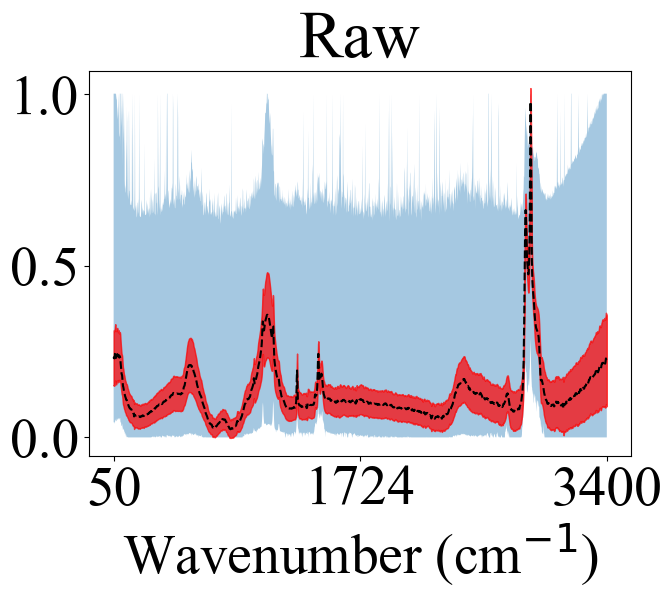

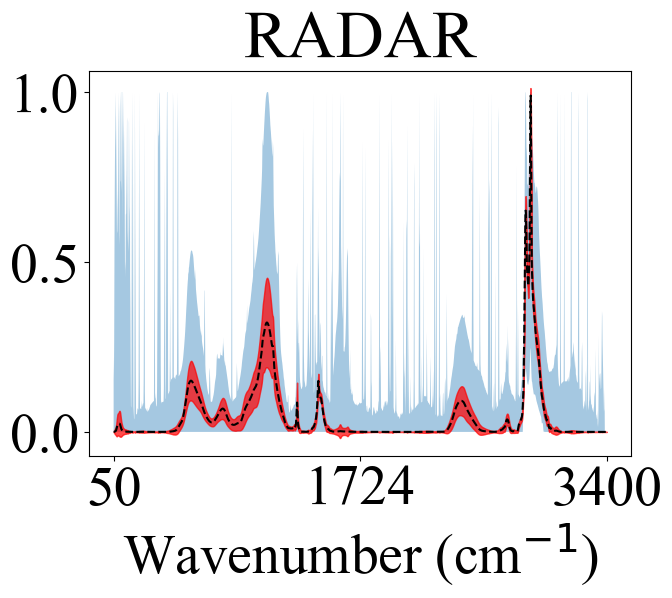

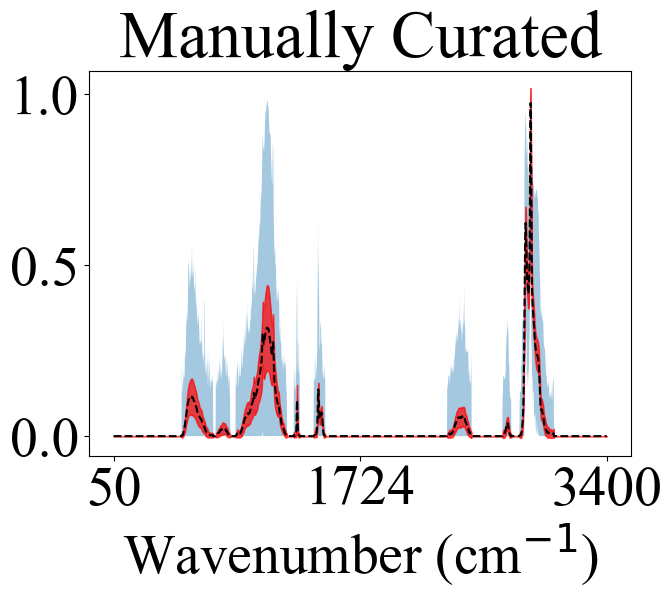

In [50]:
## Display the distribution of the different datasets
plt.rcParams.update({'font.size': 40})
plt.rcParams["font.family"] = "Times New Roman"



min_ = np.min(flat_data, axis = 0)
max_ = np.max(flat_data, axis = 0)
sd = np.std(flat_data, axis = 0)
mean = np.mean(flat_data, axis = 0)

plt.figure(figsize = (7, 5))
plt.fill_between(x_axis, min_, max_, alpha = 0.4)
plt.fill_between(x_axis, mean - sd, mean + sd, alpha = 0.7, color = "Red")
plt.plot(x_axis, mean, linestyle = "--", color = "Black")
plt.xticks(x_axis[[0, int(1737/2), 1737]])
plt.xlabel(r"Wavenumber (cm$^{-1}$)")
plt.title("Raw")
plt.savefig("Images/Histories/RawDistrPrep.png", format="png", transparent = True,
                    dpi = 1000,
                    bbox_inches='tight',
                    pad_inches=0.5)
plt.show()




min_ = np.min(normalize(flat_data_RADAR), axis = 0)
max_ = np.max(normalize(flat_data_RADAR), axis = 0)
sd = np.std(normalize(flat_data_RADAR), axis = 0)
mean = np.mean(normalize(flat_data_RADAR), axis = 0)

plt.figure(figsize = (7, 5))
plt.fill_between(x_axis, min_, max_, alpha = 0.4)
plt.fill_between(x_axis, mean - sd, mean + sd, alpha = 0.7, color = "Red")
plt.plot(x_axis, mean, linestyle = "--", color = "Black")
plt.xticks(x_axis[[0, int(1737/2), 1737]])
plt.xlabel(r"Wavenumber (cm$^{-1}$)")
plt.title("RADAR")
plt.savefig("Images/Histories/RADARDistrPrep.png", format="png", transparent = True,
                    dpi = 1000,
                    bbox_inches='tight',
                    pad_inches=0.5)
plt.show()




min_ = np.min(flat_data_MANUAL, axis = 0)
max_ = np.max(flat_data_MANUAL, axis = 0)
sd = np.std(flat_data_MANUAL, axis = 0)
mean = np.mean(flat_data_MANUAL, axis = 0)

plt.figure(figsize = (7, 5))
plt.fill_between(x_axis, min_, max_, alpha = 0.4)
plt.fill_between(x_axis, mean - sd, mean + sd, alpha = 0.7, color = "Red")
plt.plot(x_axis, mean, linestyle = "--", color = "Black")
plt.xticks(x_axis[[0, int(1737/2), 1737]])
plt.xlabel(r"Wavenumber (cm$^{-1}$)")
plt.title("Manually Curated")
plt.savefig("Images/Histories/MANUALDistrPrep.png", format="png", transparent = True,
                    dpi = 1000,
                    bbox_inches='tight',
                    pad_inches=0.5)
plt.show()

In [51]:
# Remove the labels corresponding with outliers
patient_id = patient_id[non_out_ix]
lgm_labels = lgm_labels[non_out_ix]

In [52]:
# Perform a random train, test, validation split on each sample for each of the different preprocessing methods

spectrum_len = len(flat_data[0])
print(spectrum_len)

train_x, test_x, val_x = np.empty((0, spectrum_len)), np.empty((0, spectrum_len)), np.empty((0, spectrum_len))
train_x_RADAR, test_x_RADAR, val_x_RADAR = np.empty((0, spectrum_len)), np.empty((0, spectrum_len)), np.empty((0, spectrum_len))
train_x_MANUAL, test_x_MANUAL, val_x_MANUAL = np.empty((0, spectrum_len)), np.empty((0, spectrum_len)), np.empty((0, spectrum_len))

train_y, test_y, val_y = np.empty((0)), np.empty((0)), np.empty((0))
train_lgm, test_lgm, val_lgm = np.empty((0)), np.empty((0)), np.empty((0))

unique_ids = np.arange(len(np.unique(patient_id)))
num_ids = len(unique_ids)

unique_lgm = np.unique(lgm_labels)
num_lgm = len(unique_lgm)

# Check the minimum possible length (if we take a uniform amout from each sample, otherwise can be ignored)
min_spectra = np.inf
for l in np.unique(patient_id):
    l = len(flat_data[patient_id == l])

    if l < min_spectra:
        min_spectra = l
        
print("smallest sample size:", min_spectra)


for num_label, label in enumerate(np.unique(patient_id)):
    print(label, num_label)
    sample = np.copy(np.squeeze(flat_data[patient_id == label]))
    sample_RADAR = np.copy(np.squeeze(flat_data_RADAR[patient_id == label]))
    sample_MANUAL = np.copy(np.squeeze(flat_data_MANUAL[patient_id == label]))

    lgm_labs = np.copy(np.squeeze(lgm_labels[patient_id == label]))
    
    num_spectra = len(sample)

    
    ix = np.arange(num_spectra)
    train_split = int(num_spectra * 0.8) # 80% of the sample spectra allocated to training
    test_split = train_split + int((num_spectra - train_split) * 0.5) # The remaining spectra are split 50/50 between validation and test
    val_split = num_spectra

    # Shuffle the data
    np.random.seed(0)
    np.random.shuffle(ix)
    sample = np.squeeze(sample[ix])
    sample_RADAR = np.squeeze(sample_RADAR[ix])
    sample_MANUAL = np.squeeze(sample_MANUAL[ix])
    
    # Assign the datapoints to the split
    print(train_x.shape, sample.shape, num_spectra)
    train_x = np.concatenate((train_x, sample[: train_split]), axis = 0)
    test_x = np.concatenate((test_x, sample[train_split: test_split]), axis = 0)
    val_x = np.concatenate((val_x, sample[test_split: val_split]), axis = 0)

    train_x_RADAR = np.concatenate((train_x_RADAR, sample_RADAR[: train_split]), axis = 0)
    test_x_RADAR = np.concatenate((test_x_RADAR, sample_RADAR[train_split: test_split]), axis = 0)
    val_x_RADAR = np.concatenate((val_x_RADAR, sample_RADAR[test_split: val_split]), axis = 0)

    train_x_MANUAL = np.concatenate((train_x_MANUAL, sample_MANUAL[: train_split]), axis = 0)
    test_x_MANUAL = np.concatenate((test_x_MANUAL, sample_MANUAL[train_split: test_split]), axis = 0)
    val_x_MANUAL = np.concatenate((val_x_MANUAL, sample_MANUAL[test_split: val_split]), axis = 0)

    # Provide labels for the different sets, for ID classificaton
    train_y = np.concatenate((train_y, np.ones(train_split) * num_label))
    test_y = np.concatenate((test_y, np.ones(test_split - train_split) * num_label))
    val_y = np.concatenate((val_y, np.ones(val_split - test_split) * num_label))

    # Methylation labels
    train_lgm = np.concatenate((train_lgm, lgm_labs[: train_split]))
    test_lgm = np.concatenate((test_lgm, lgm_labs[train_split: test_split]))
    val_lgm = np.concatenate((val_lgm, lgm_labs[test_split: val_split]))


1738
smallest sample size: 1601
HF-1002_V1AT_1.h5_0.npy 0
(0, 1738) (3090, 1738) 3090
HF-1002_V2AT_1.h5_1.npy 1
(2472, 1738) (4089, 1738) 4089
HF-1010_V1T_1.h5_0.npy 2
(5743, 1738) (3328, 1738) 3328
HF-1016_IAT_2.h5_1.npy 3
(8405, 1738) (7223, 1738) 7223
HF-1043_V1AM_1.h5_0.npy 4
(14183, 1738) (4059, 1738) 4059
HF-1086_#1_1.h5_1.npy 5
(17430, 1738) (2692, 1738) 2692
HF-1293_13_1.h5_0.npy 6
(19583, 1738) (6246, 1738) 6246
HF-1295_V3AM_2.h5_1.npy 7
(24579, 1738) (14362, 1738) 14362
HF-1334_V58-B_2_1.h5_2.npy 8
(36068, 1738) (6787, 1738) 6787
HF-1825_V2B_1.h5_2.npy 9
(41497, 1738) (4030, 1738) 4030
HF-1887_via-t_2_1.h5_3.npy 10
(44721, 1738) (5778, 1738) 5778
HF-2070_V1T_1.h5_4.npy 11
(49343, 1738) (3559, 1738) 3559
HF-2102_V2BB_1.h5_3.npy 12
(52190, 1738) (3464, 1738) 3464
HF-2102_V3AM_1.h5_4.npy 13
(54961, 1738) (3301, 1738) 3301
HF-2102_V3AM_2.h5_5.npy 14
(57601, 1738) (3268, 1738) 3268
HF-2104_#5_1.h5_0.npy 15
(60215, 1738) (3475, 1738) 3475
HF-2104_#9_1.h5_1.npy 16
(62995, 1738) (386

In [53]:
# Shuffle after training set to obfuscate sample of origin
indices = np.arange(len(train_x))
np.random.seed(0)
np.random.shuffle(indices)
train_x = train_x[indices]
train_x_RADAR = train_x_RADAR[indices]
train_x_MANUAL = train_x_MANUAL[indices]

# Remember to shuffle the labels as well
train_y = train_y[indices]
train_lgm = train_lgm[indices]



# Based on the above enumeration of the samples, the ones which share the prefix patient id are listed here for ease of access


HF-1002: [0, 1]

HF-2102: [12, 13, 14]

HF-2104: [15, 16, 17]

HF-2493: [22, 23]

HF-2619: [30, 31]

HF-2849: [36, 37, 38, 39]

HF-682:  [50, 51]

HF-894:  [53, 54]

HF-988:  [57, 58]

With this the total number of unique sample ids would be 45

In [54]:
train_x.shape, val_x.shape, test_x.shape

((208714, 1738), (26120, 1738), (26088, 1738))

In [55]:
train_y.shape, val_y.shape, test_y.shape

((208714,), (26120,), (26088,))

In [56]:
# One-hot-encode ids
eye = np.eye(len(np.unique(patient_id)))
train_y = eye[train_y.astype(int)]
test_y = eye[test_y.astype(int)]
val_y = eye[val_y.astype(int)]

# One-hot-encode lgm 
eye = np.eye(len(np.unique(lgm_labels.astype(int))))
train_lgm = eye[train_lgm.astype(int)-1]
test_lgm = eye[test_lgm.astype(int)-1]
val_lgm = eye[val_lgm.astype(int)-1]

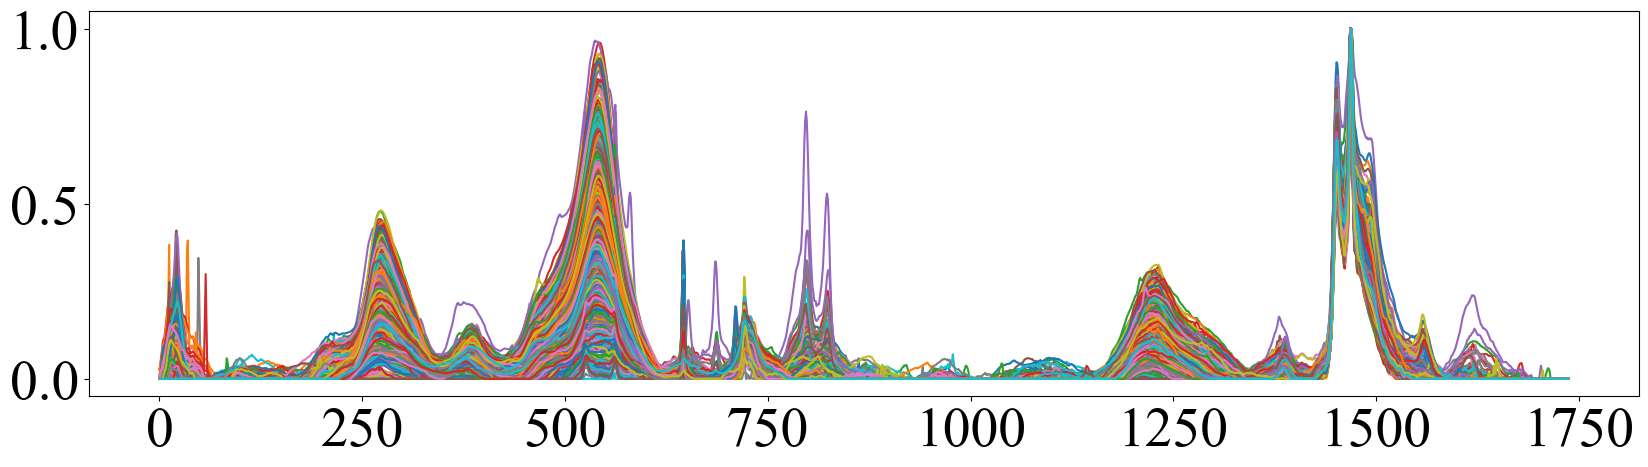

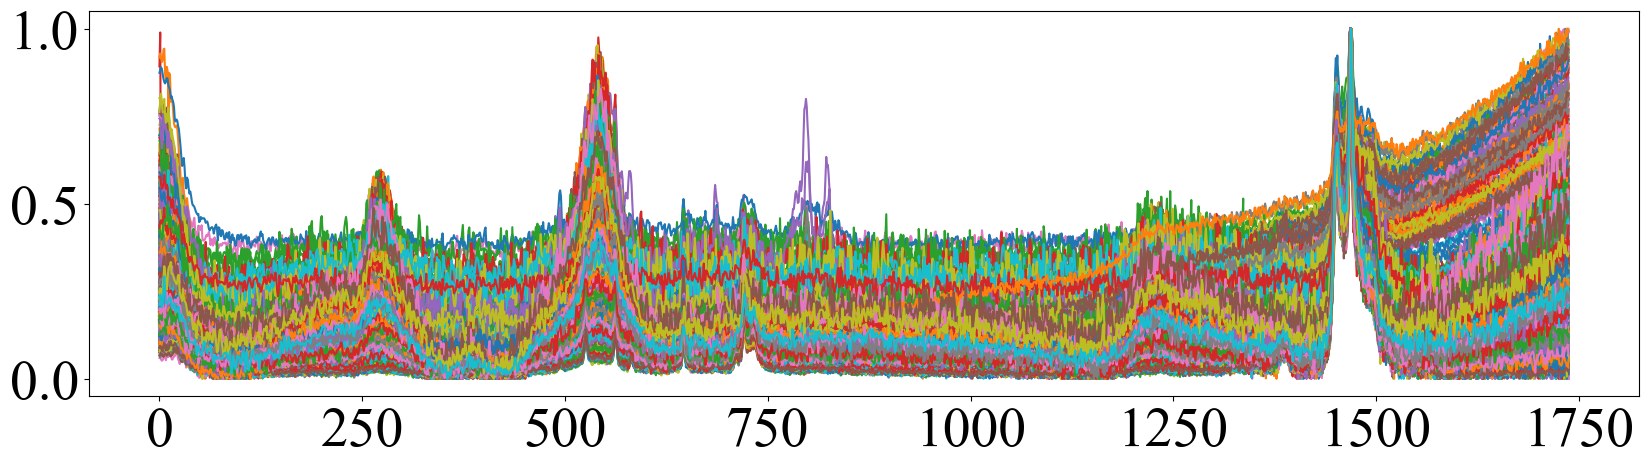

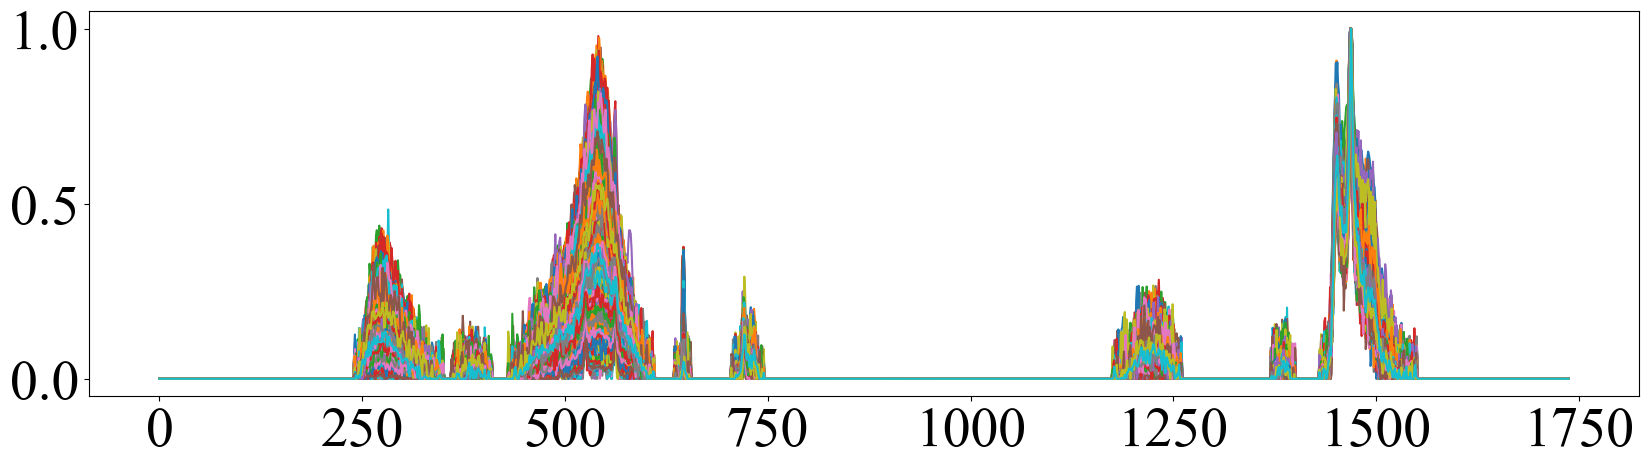

In [35]:
# Look at the 5000 first spectra in each dataset again, outliers appear to be removed

plt.figure(figsize = (20, 5))
plt.plot(train_x[:5000].T)
plt.show()

plt.figure(figsize = (20, 5))
plt.plot(train_x_RADAR[:5000].T)
plt.show()

plt.figure(figsize = (20, 5))
plt.plot(train_x_MANUAL[:5000].T)
plt.show()

In [58]:
train_y.shape, val_y.shape, test_y.shape

((208714, 59), (26120, 59), (26088, 59))

In [59]:
p = "Data/"

np.save(p + "train_x.npy", train_x)
np.save(p + "train_x_RADAR.npy", normalize(train_x_RADAR))
np.save(p + "train_x_MANUAL.npy", normalize(train_x_MANUAL))

np.save(p + "test_x.npy", test_x)
np.save(p + "test_x_RADAR.npy", normalize(test_x_RADAR))
np.save(p + "test_x_MANUAL.npy", normalize(test_x_MANUAL))

np.save(p + "val_x.npy", val_x)
np.save(p + "val_x_RADAR.npy", normalize(val_x_RADAR))
np.save(p + "val_x_MANUAL.npy", normalize(val_x_MANUAL))

np.save(p + "train_y.npy", train_y)
np.save(p + "test_y.npy", test_y)
np.save(p + "val_y.npy", val_y)

np.save(p + "train_lgm.npy", train_lgm)
np.save(p + "test_lgm.npy", test_lgm)
np.save(p + "val_lgm.npy", val_lgm)

In [60]:
# Create a dictionary with the simplified label enumerations
# Combine sample IDs according to patient labels
unique_labels = np.unique([name.split("_")[0] for name in list(np.unique(patient_id))])
print(len(unique_labels))
label_dict = {}
for en, n in enumerate(unique_labels):
    label_dict[n] = en

46


In [62]:
p = "Data/"

train_y = np.load(p + "train_y.npy")
test_y = np.load(p + "test_y.npy")
val_y = np.load(p + "val_y.npy")

for y, name in zip([train_y, val_y, test_y], ["train_y_46.npy", "val_y_46.npy", "test_y_46.npy"]):
    
    train_y_copy = np.argmax(y, axis = 1)
    
    for en, full_id in enumerate(np.unique(patient_id)):

        simple_label = full_id.split("_")[0]
        train_y_copy[train_y_copy == en] = label_dict[simple_label]

    eye = np.eye(len(np.unique(train_y_copy)))
    train_y_copy = eye[train_y_copy]
    print(train_y_copy.shape)
    np.save("Data/"+name, train_y_copy)

(208714, 46)
(26120, 46)
(26088, 46)


In [6]:
p = "Data/"
train_y = np.load(p + "train_y_46.npy")
test_y = np.load(p + "test_y_46.npy")
val_y = np.load(p + "val_y_46.npy")

train_y.shape, val_y.shape, test_y.shape

((208714, 46), (26120, 46), (26088, 46))